<h1> Lab 3: Reducing Crime</h1>

<h3> Ammara Essa, Curtis Lin, and David Wheeler </h3>
      

## Table of Contents: <a class="anchor" id="toc-q"></a>
* [Objectives](#first-q)
* [Variable selection and transformation](#second-q)
* [Summary statistics and prelimary sanity checks](#third-q)
* [Exploratory data analyses](#fourth-q)
* [Inferential Analyses](#fifth-q)
* [Regression Diagnostics](#sixth-q)
* [Discussion and Conclusion](#seventh-q)
* [Appendix](#eigth-q)

## Objectives <a class="anchor" id="first-q"></a>  
[Back to Table of Contents](#toc-q)

**1. Introduction and motivation**

* Public safety is a major concern for constituents and elected officials alike, especially during elections. By identifying determinants of crime in North Carolina, we can develop policy suggestions to help the campaign deliver on the promise of reducing crime rates, which can in turn bolster their public support. Specifically, we want to understand if crime rates are explained best by geographic, demographic, economic, criminal history variables or a combination of such variables?

**2. Help the North Carolina polictical campaign understand the determinants of crime.**
* Aim for causal estimates of the determinants of crime & clearly explain how omitted variables may affect conclusions.
   
**3. Generate policy suggestions that are applicable to local government.**
* Aim to identify key variables which help local government reducing crime rate in a time- and cost-effective manners. 


## Variable selection and transformation<a class="anchor" id="second-q"></a>  
[Back to Table of Contents](#toc-q)

**1. What do you want to measure? Make sure you identify variables that will be relevant to the concerns of the political campaign.**
    
   * For the response variable, we want to identify the determinants of crime (construct), here expressed with the measured variable $crmrte$. For the explanatory variables, we propose to use variables associated with:
        * geography (e.g. $county$, $west$, and $central$) since crime is often associated with place (see David Weisburd's work) & resultant models could be used to inform policies for specific locales. 
        * demographics (e.g. $polpc$, $density$, and $pctymle$) since crime is often associated with demographics & resultant models could be used to help demographics of interest reduce crime.
        * economics (e.g. $wcon$, $wtuc$, and $wtrd$) since wages could conceivably be associated with crime rates & resultant models could be used to justify wage change policies to reduce crime rates.
        * probabilities to be arrested, be convicted, and prison sentence lengths (e.g. $prbarr$, $prbconv$, and $avgsen$) since crimes are often commited by repeat offenders and & resultant models could be used to justify policy changes in prison systems.

**2. What covariates help you identify a causal effect? What covariates are problematic, either due to multicollinearity, or because they will absorb some of a causal effect you want to measure?**
* We propose to that variables related to geography (e.g. $west$, $central$,etc...), demography (e.g. $density$,$polpc$, etc... ), economics (e.g. $taxpc$,$fed$, etc... ), and criminal history (e.g. $prbarr$, $prconv$, etc... ) might help us idenitfy highly associated, and perhaps $causal$, determinants of crime.
* While there is some mulitcollinearity, for example among the wage variables, it is far from perfect multicollinearity- thus multicollinearity will likely not cause dramtic problems herein.
* The intercepts, $\beta_0$, will also be critical to absorb some of the variation from omitted variables that cause crime rates to vary.

**3. What transformations should you apply to each variable? This is very important because transformations can reveal linearities in the data, make our results relevant, or help us meet model assumptions.**
* The response variable $crmrte$ and all continuous explainatory variables were log-transformed, with natural logs, to reveal a roughly linear relationships with $crmrte$. Categorical variables, such as $west$, $central$, etc... were not log-transformed.
* Additionally, these transformations revealed a roughly linear relationship between $mix$ and $prbarr$ which was be used as justfication to remove the former from the models and simplify future analyses. 


**4. Are your choices supported by EDA? You will likely start with some general EDA to detect anomalies (missing values, top-coded variables, etc.). From then on, your EDA should be interspersed with your model building. Use visual tools to guide your decisions.**

* Yes, the 2D and 3D scatterplot matrices presented below illustrate our choices and transformations of covariates. For example, $crmte$ is related to $density$ but only after log-transformed.

## Summary statistics & preliminary sanity checks<a class="anchor" id="third-q"></a>  
[Back to Table of Contents](#toc-q)

**Install and invoke packages**

In [4]:
# install.packages("car")
# install.packages("GGally")
# install.packages("scatterplot3d")
# install.packages("lmtest")
# install.packages("sandwich")
library(car)
library(stargazer)
library(GGally)
library(scatterplot3d)
#library(PerformanceAnalytics)
library(lmtest)
library(sandwich)

Loading required package: carData

Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 

Loading required package: ggplot2
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



**Load data**

In [1]:
df = read.csv("crime_v2.csv",header=T)

**Check types of variables**

In [2]:
str(df)

'data.frame':	97 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : Factor w/ 92 levels "","`","0.068376102",..: 63 89 13 62 52 3 59 78 42 86 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  33

**Perform summary statistics**

In [5]:
stargazer(df, type="text")


Statistic N   Mean   St. Dev.   Min   Pctl(25) Pctl(75)    Max   
-----------------------------------------------------------------
county    91 101.615  58.794   1.000   52.000  152.000   197.000 
year      91 87.000   0.000   87.000   87.000   87.000   87.000  
crmrte    91  0.033   0.019    0.006   0.021    0.040     0.099  
prbarr    91  0.295   0.137    0.093   0.206    0.344     1.091  
prbpris   91  0.411   0.080    0.150   0.365    0.457     0.600  
avgsen    91  9.647   2.847    5.380   7.340    11.420   20.700  
polpc     91  0.002   0.001    0.001   0.001    0.002     0.009  
density   91  1.429   1.514   0.00002  0.547    1.568     8.828  
taxpc     91 38.055   13.078  25.693   30.662   40.948   119.761 
west      91  0.253   0.437    0.000   0.000    0.500     1.000  
central   91  0.374   0.486    0.000   0.000    1.000     1.000  
urban     91  0.088   0.285    0.000   0.000    0.000     1.000  
pctmin80  91 25.495   17.017   1.284   9.845    38.142   64.348  
wcon     

**Convert $county,\;west,\;central,$ and $ urban$ from numerics to factors**

In [7]:
df$county= factor(df$county)
df$west= factor(df$west)
df$central= factor(df$central)
df$urban= factor(df$urban)

**Convert $prbconv$ from factor to numeric**

In [8]:
df$prbconv = as.numeric(as.character(df$prbconv))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

**Locate missing values, NAs**

In [9]:
apply(is.na(df), 2, which) 

county year crmrte prbarr prbconv prbpris avgsen polpc density taxpc ⋯
[1,] 92     92   92     92     92      92      92     92    92      92    ⋯
[2,] 93     93   93     93     93      93      93     93    93      93    ⋯
[3,] 94     94   94     94     94      94      94     94    94      94    ⋯
[4,] 95     95   95     95     95      95      95     95    95      95    ⋯
[5,] 96     96   96     96     96      96      96     96    96      96    ⋯
[6,] 97     97   97     97     97      97      97     97    97      97    ⋯
     wtuc wtrd wfir wser wmfg wfed wsta wloc mix pctymle
[1,] 92   92   92   92   92   92   92   92   92  92     
[2,] 93   93   93   93   93   93   93   93   93  93     
[3,] 94   94   94   94   94   94   94   94   94  94     
[4,] 95   95   95   95   95   95   95   95   95  95     
[5,] 96   96   96   96   96   96   96   96   96  96     
[6,] 97   97   97   97   97   97   97   97   97  97

Note that rows 92-97 are all missing data, NAs

**Remove rows with missing values, NAs, for analyses**

In [10]:
crime.narm <- na.omit(df)

**Remove the  𝑦𝑒𝑎𝑟  variable - it is a constant**

In [11]:
df$year = NULL

**In the $prbarr$ & $prbconv$ variables, there are instances which are larger than 1.**

In [12]:
paste("Summary of prbarr variable")
summary(df$prbarr)
paste("Summary of prbconv variable")
summary(df$prbconv)

[1] "Summary of prbarr variable"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
0.09277 0.20568 0.27095 0.29492 0.34438 1.09091       6 

[1] "Summary of prbconv variable"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
0.06838 0.34541 0.45283 0.55128 0.58886 2.12121       6 

*The $prbconv$ has 10 cases with $p$ > 1*

In [13]:
lenprbconv <- length(df[which(df$prbconv > 1),]$prbconv)
paste("Number of prbconv > 1: ", lenprbconv)

[1] "Number of prbconv > 1:  10"

*The $prbarr$ has 1 case with $p$ > 1*

In [14]:
lenprbarr <- length(df[which(df$prbarr > 1),]$prbarr)
paste("Number of prbarr > 1: ", lenprbarr)

[1] "Number of prbarr > 1:  1"

**Justification for the inclusion of *prbarr* and *prconv* values > 1**

As we can see, the two variables described by the study as *prbarr* ('probability' of arrest) and *prbconv*	('probability' of conviction) have values > 1. The first instinct may be to discard the values > 1, since the variable is supposedly a probability and probability *p* can only take valid values $0 \leq p \leq 1$. However, before that, we need to further look into how the study defines the variables. The research by C. Cornwell and W. Trumball (1994), “Estimating the Economic Model of Crime with Panel Data,” Review of Economics and Statistics 76, 360-366. defines  
- The probability of arrest ($P_a$ or *prbarr* in the dataset) is the ratio of arrests to offenses
- The probability of conviction ($P_c$ or *prbconv* in the dataset) is the ratio of convictions to arrests

Let's consider the variable *prbconv*. In this case, there are few reasons why the ratio of convictions to arrests may be greater than 1. The police could perhaps make a single arrest of multiple people, which could result in multiple convictions. Or a single person could be arrested but convicted for multiple crimes (e.g. a single arrest could lead to someone being convicted of assualt with a deadly weapon, breaking+entering and theft). Therefore, we do not consider *prbconv* to strictly indicate probability (which would be constrained by $0 \leq p \leq 1$). Moreover, instead of truncating entries > 1 to 1 or discarding the values completely, we will leave the entries in the dataset used for the analysis. We have used the same approach for *prbarr* and again did not discard values > 1. The consequences of the inclusion of the *prbarr* and *prconv* values > 1 will be reflected in our interpretation of the coefficients below.

More formally, in probability theory, all variables should follow $f(x)\in [0,1]{\mbox{ for all }}x\in \Omega$. However, the $prbarr$ and $prbconv$ indicated the ratio of arrests to offenses and the ratio to conviction, respectively. These two variables, and all observations therein (not just those >1) do not satisfy the axioms of probability theory. Therefore, the $prbarr > 1$ and $prbconv > 1$ were kept for OLS analysis but are not interpreted probabilistically below. 


**The dimensions of the final dataframe**

In [15]:
dim(crime.narm)

[1] 91 25

## Exploratory data analyses<a class="anchor" id="fourth-q"></a>  
[Back to Table of Contents](#toc-q)

**Check the scale among variables**

In [16]:
head(crime.narm)

county year crmrte    prbarr   prbconv   prbpris  avgsen polpc      density  
1 1      87   0.0356036 0.298270 0.5275960 0.436170  6.71  0.00182786 2.4226327
2 3      87   0.0152532 0.132029 1.4814800 0.450000  6.35  0.00074588 1.0463320
3 5      87   0.0129603 0.444444 0.2678570 0.600000  6.76  0.00123431 0.4127659
4 7      87   0.0267532 0.364760 0.5254240 0.435484  7.14  0.00152994 0.4915572
5 9      87   0.0106232 0.518219 0.4765630 0.442623  8.22  0.00086018 0.5469484
6 11     87   0.0146067 0.524664 0.0683761 0.500000 13.00  0.00288203 0.6113361
  taxpc    ⋯ wtuc     wtrd     wfir     wser     wmfg   wfed   wsta   wloc  
1 30.99368 ⋯ 408.7245 221.2701 453.1722 274.1775 334.54 477.58 292.09 311.91
2 26.89208 ⋯ 376.2542 196.0101 258.5650 192.3077 300.38 409.83 362.96 301.47
3 34.81605 ⋯ 372.2084 229.3209 305.9441 209.6972 237.65 358.98 331.53 281.37
4 42.94759 ⋯ 397.6901 191.1720 281.0651 256.7214 281.80 412.15 328.27 299.03
5 28.05474 ⋯ 377.3126 206.8215 289.3125 215.1933 290.89 377.35 367.23 342.82
6 35.22974 ⋯ 401.3378 187.8255 258.5650 237.1507 258.60 391.48 325.71 275.22
  mix        pctymle   
1 0.08016878 0.07787097
2 0.03022670 0.08260694
3 0.46511629 0.07211538
4 0.27362204 0.07353726
5 0.06008584 0.07069755
6 0.31952664 0.09891920

**Figure 1: Distributions of variables**
  * Note that most variables are not normally distributed

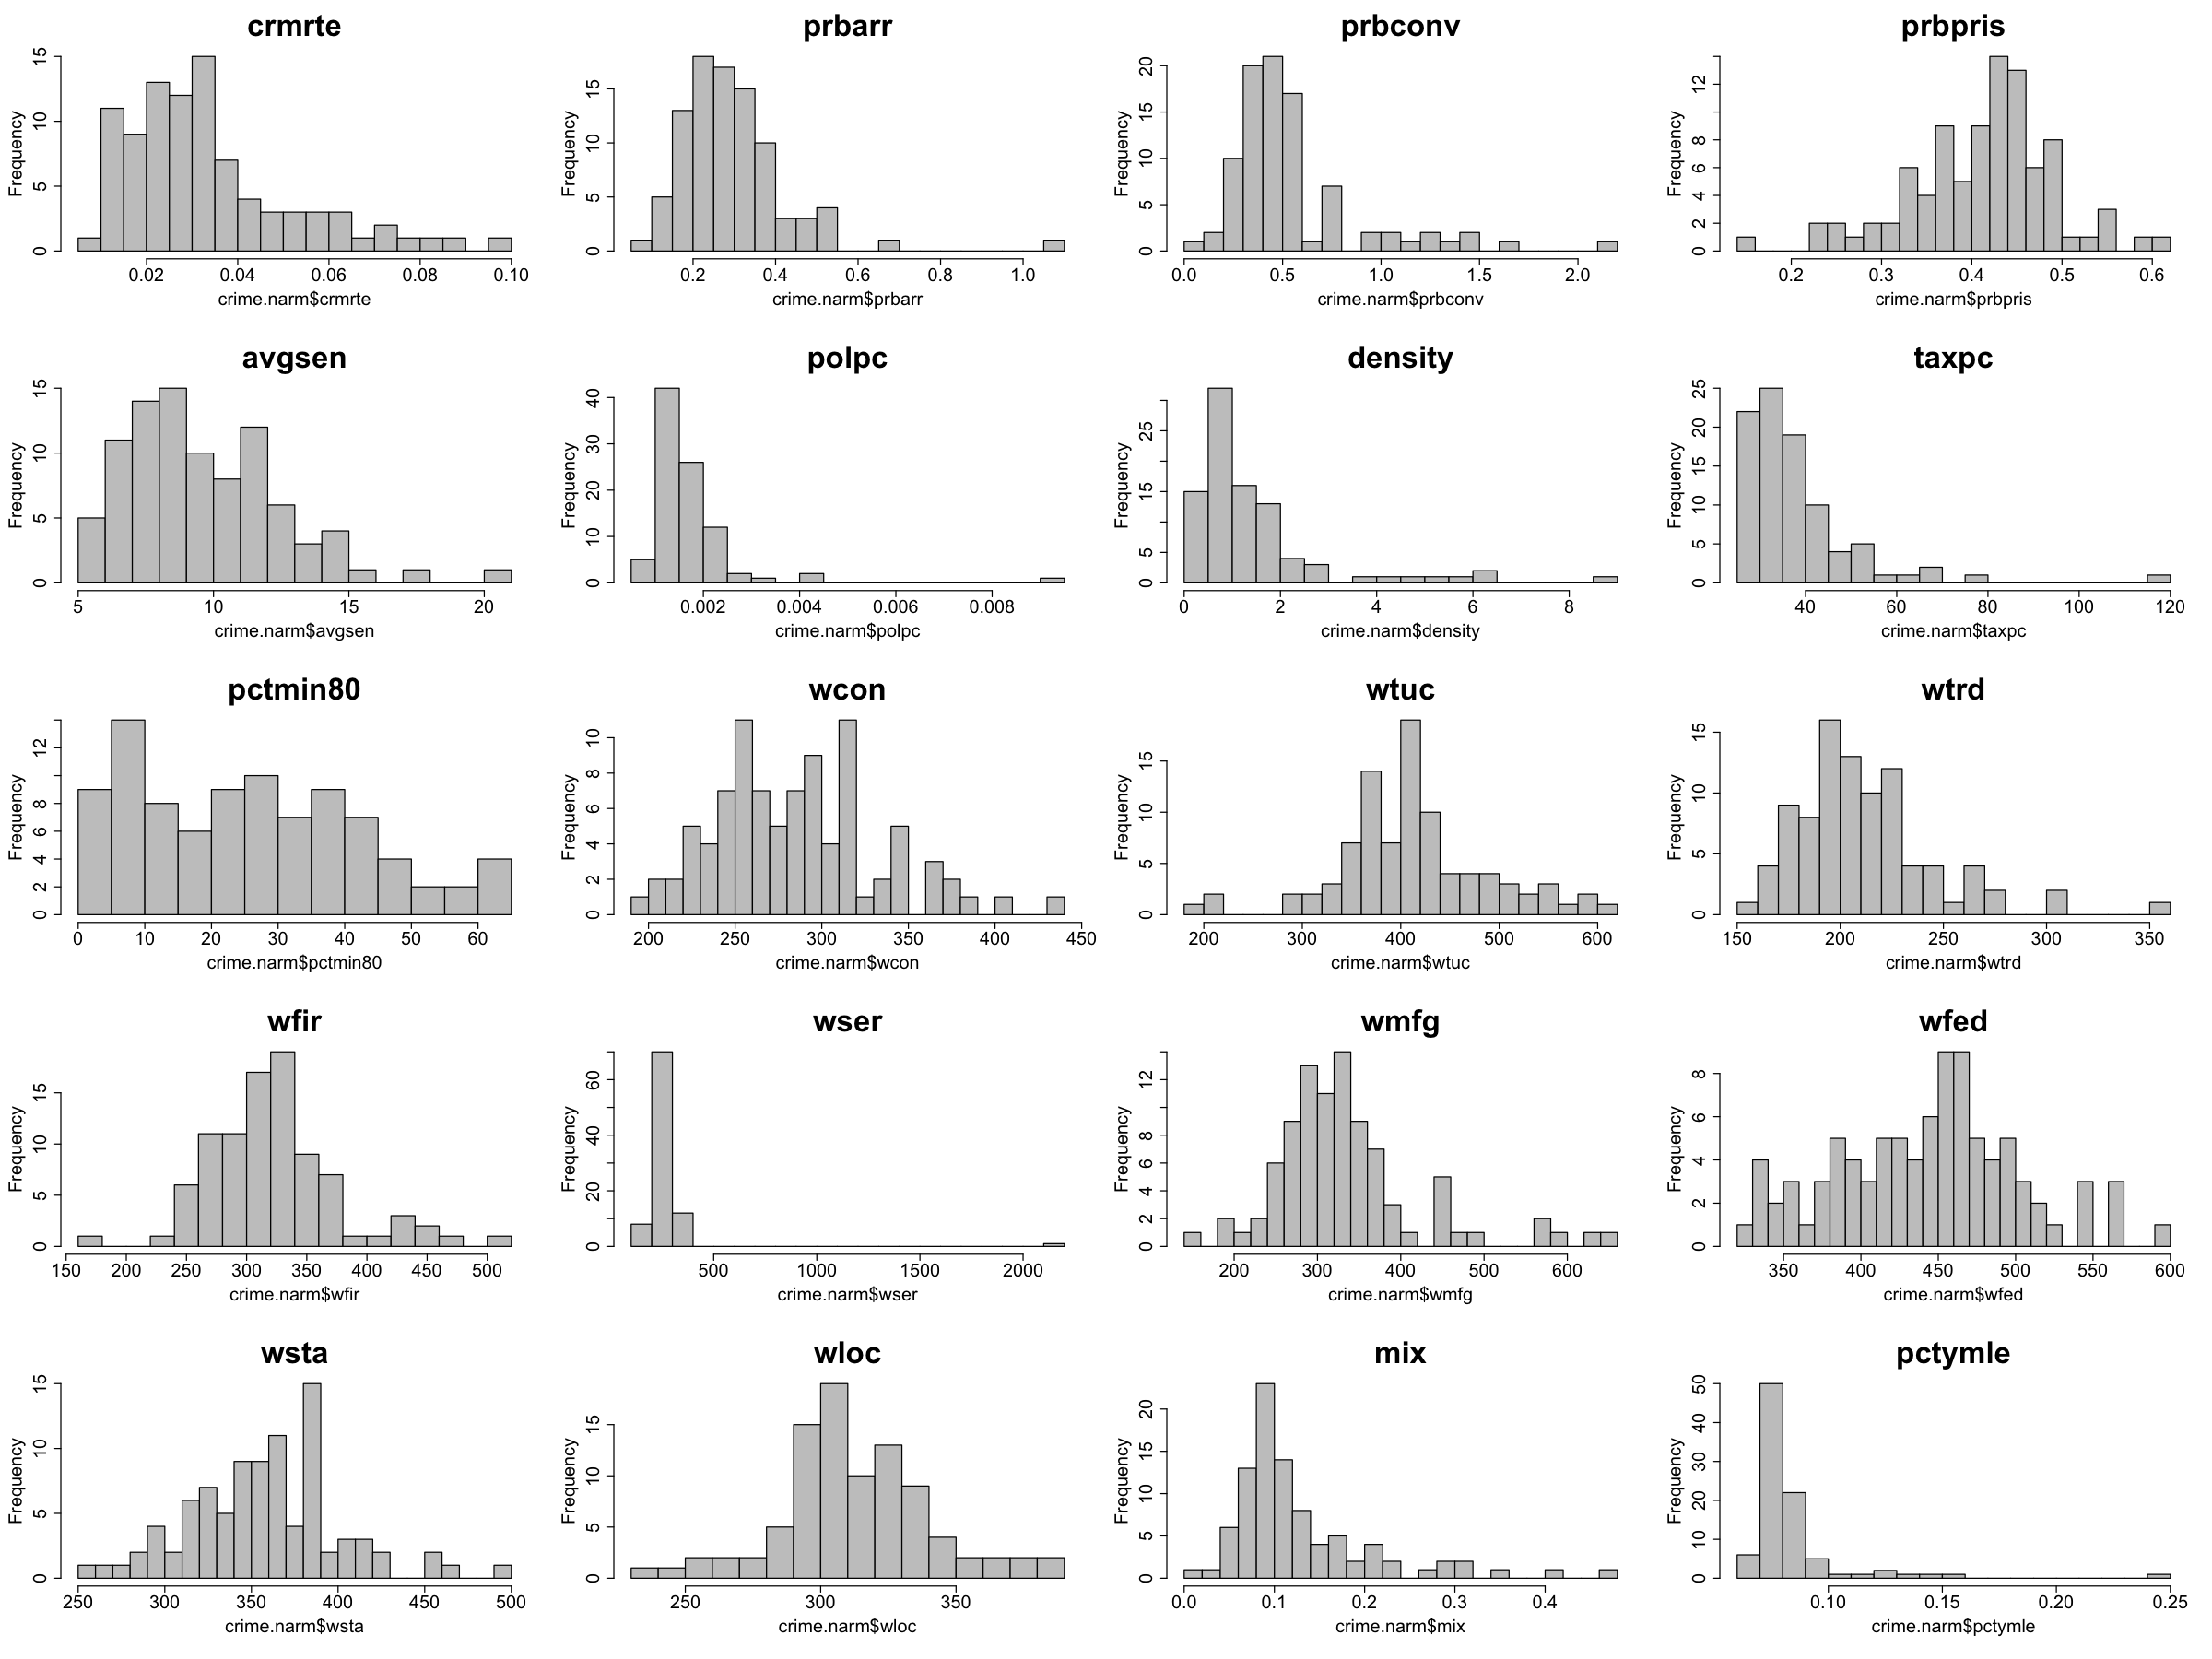

In [17]:
options(repr.plot.height = 15, repr.plot.width = 20, repr.plot.pointsize = 10)
par(mfrow = c(5,4))
par(mar=c(6,5,4,2))
hist(crime.narm$crmrte,breaks=20, main = "crmrte",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(crime.narm$prbarr,breaks=20, main = "prbarr",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(crime.narm$prbconv,breaks=20, main = "prbconv",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(crime.narm$prbpris,breaks=20, main = "prbpris",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(crime.narm$avgsen,breaks=20, main = "avgsen",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(crime.narm$polpc,breaks=20, main = "polpc",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(crime.narm$density,breaks=20, main = "density",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(crime.narm$taxpc,breaks=20, main = "taxpc",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(crime.narm$pctmin80,breaks=20, main = "pctmin80",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(crime.narm$wcon,breaks=20, main = "wcon",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(crime.narm$wtuc,breaks=20, main = "wtuc",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(crime.narm$wtrd,breaks=20, main = "wtrd",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(crime.narm$wfir,breaks=20, main = "wfir",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(crime.narm$wser,breaks=20, main = "wser",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(crime.narm$wmfg,breaks=20, main = "wmfg",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(crime.narm$wfed,breaks=20, main = "wfed",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(crime.narm$wsta,breaks=20, main = "wsta",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(crime.narm$wloc,breaks=20, main = "wloc",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(crime.narm$mix,breaks=20, main = "mix",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(crime.narm$pctymle,breaks=20, main = "pctymle",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")

> All the analyses were based on the log-transformed data because most variables show positive skew (except: *prbpris, wtuc, wfir, and wloc*) and the scale differences among variables are incompatible and range from 0.005 to 2177.1.   

**Figure 2: Distributions of variables after log-transformation**
  * Note that log-transformation resolved most instances of non-symetric distributions

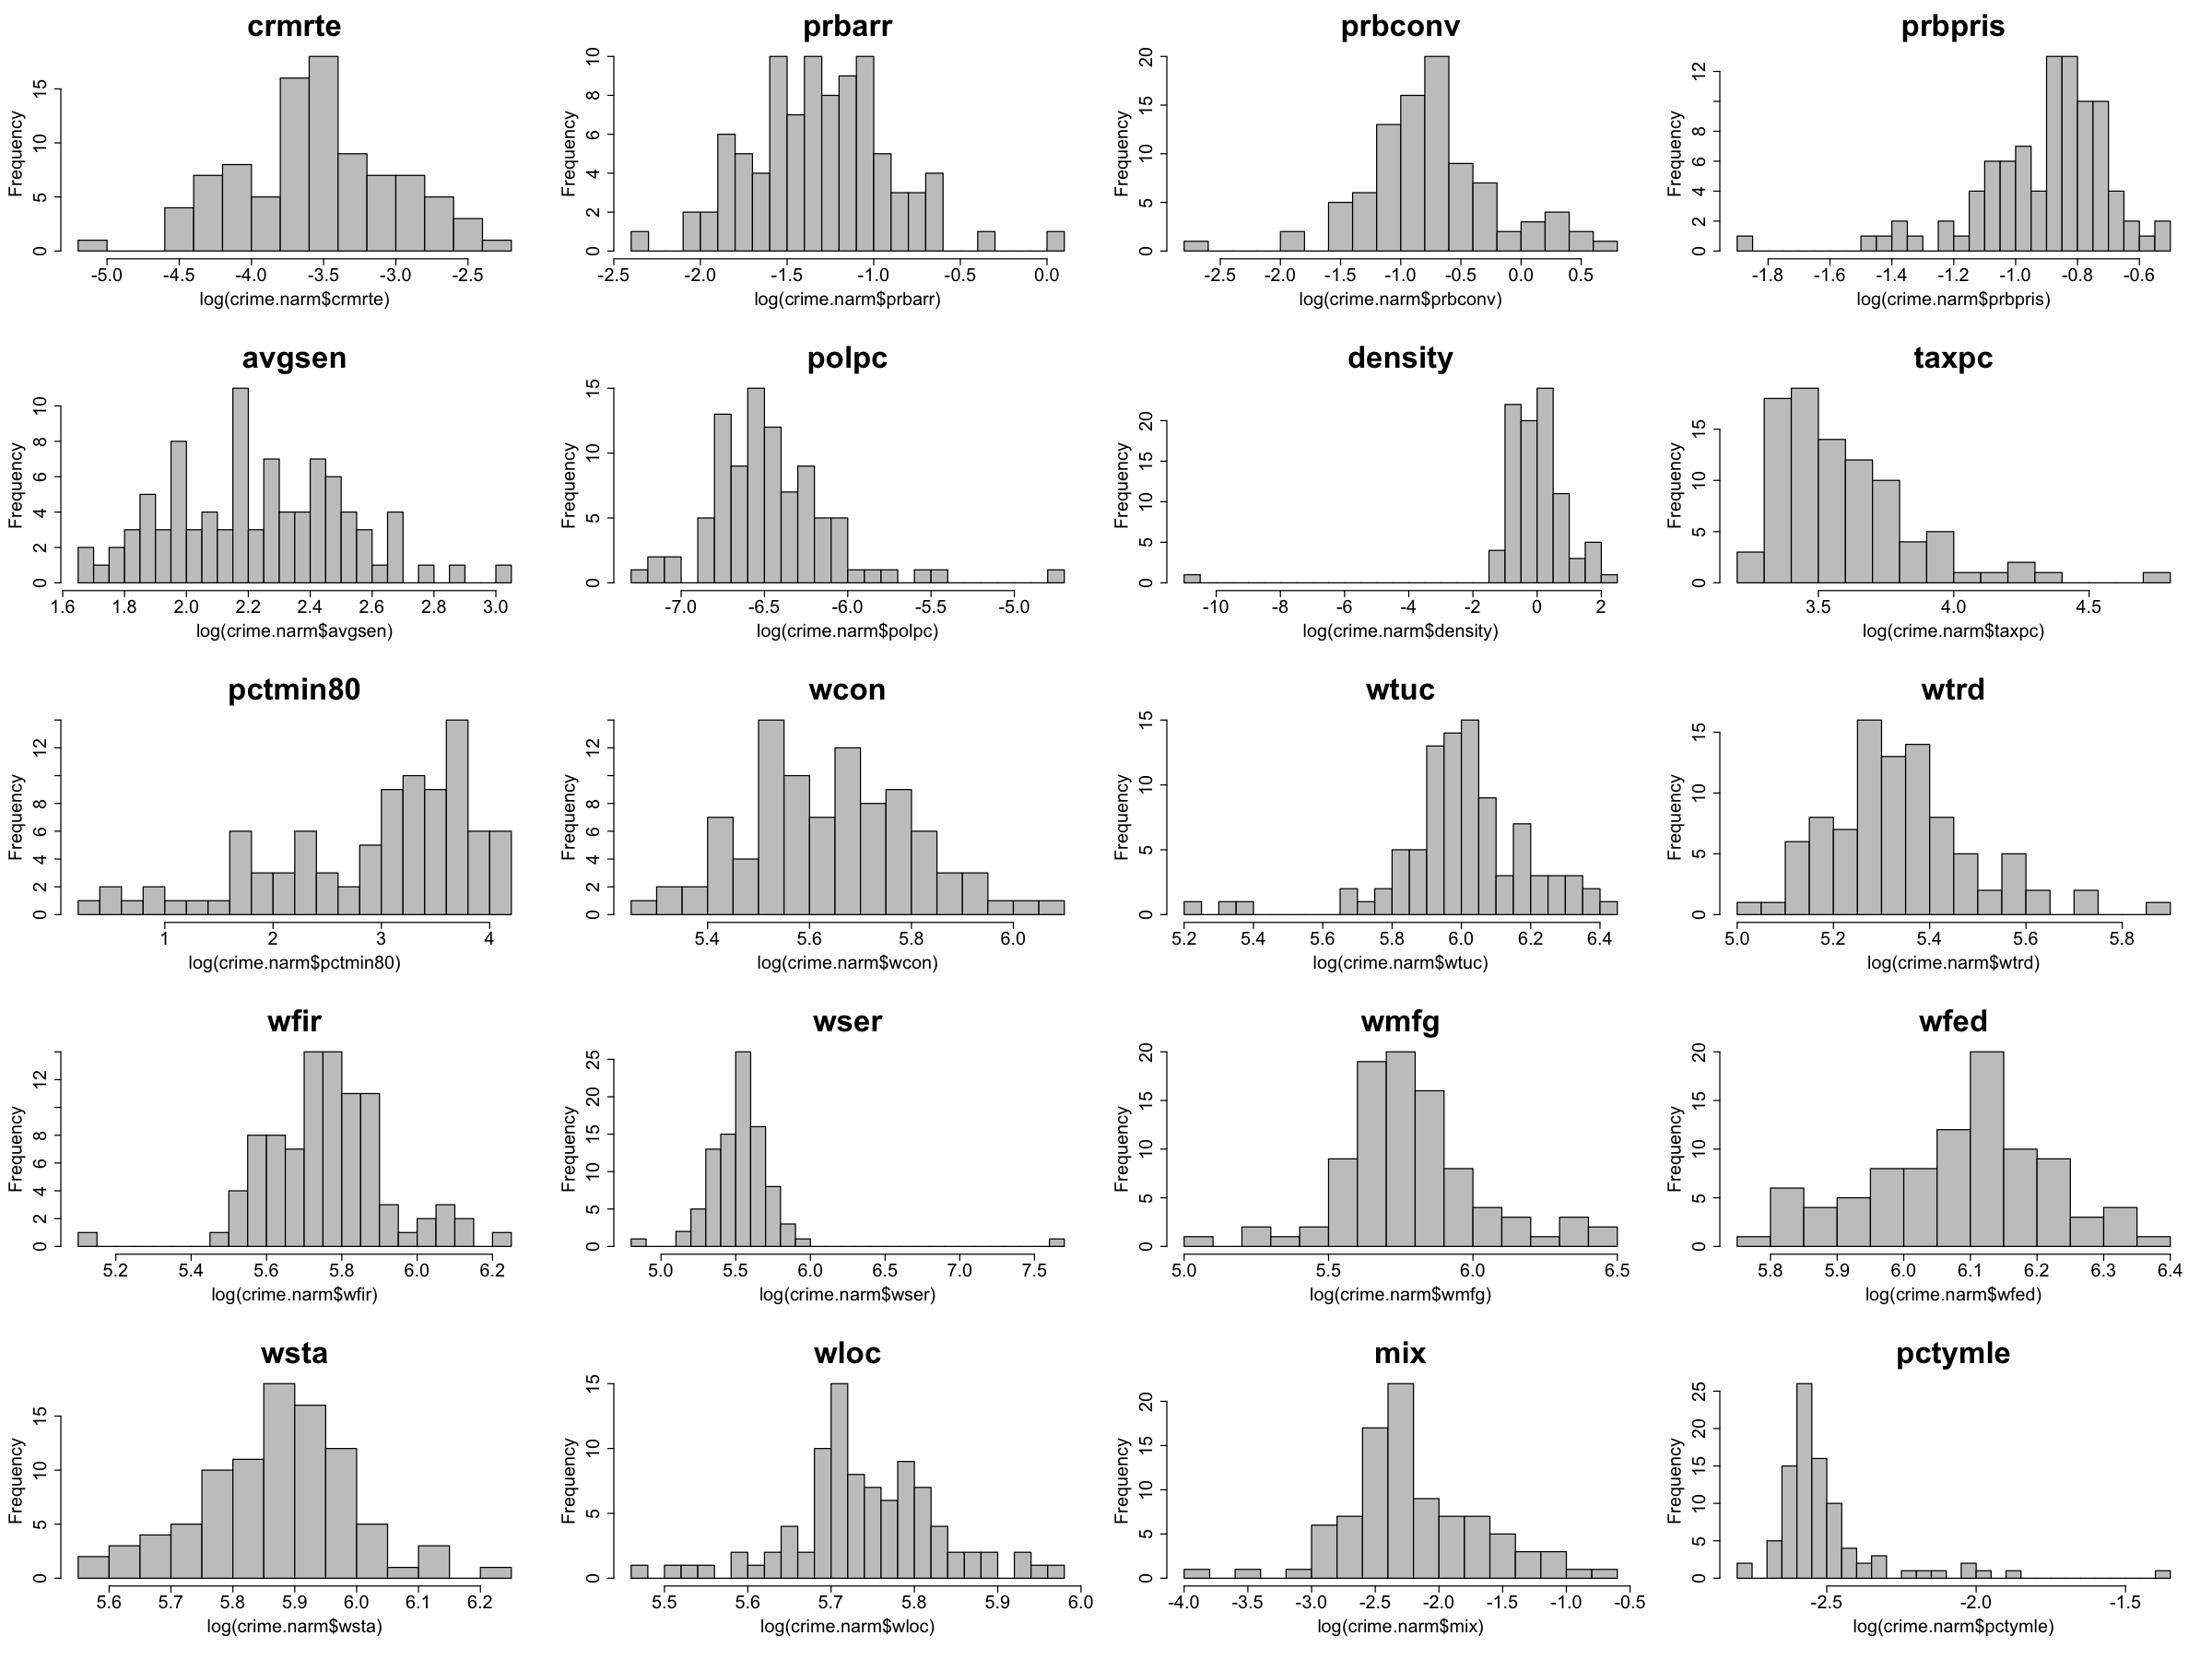

In [18]:
options(repr.plot.height = 15, repr.plot.width = 20, repr.plot.pointsize = 10)
par(mfrow = c(5,4))
par(mar=c(6,5,4,2))
hist(log(crime.narm$crmrte),breaks=20, main = "crmrte",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(log(crime.narm$prbarr),breaks=20, main = "prbarr",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(log(crime.narm$prbconv),breaks=20, main = "prbconv",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(log(crime.narm$prbpris),breaks=20, main = "prbpris",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(log(crime.narm$avgsen),breaks=20, main = "avgsen",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(log(crime.narm$polpc),breaks=20, main = "polpc",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(log(crime.narm$density),breaks=20, main = "density",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(log(crime.narm$taxpc),breaks=20, main = "taxpc",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(log(crime.narm$pctmin80),breaks=20, main = "pctmin80",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(log(crime.narm$wcon),breaks=20, main = "wcon",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(log(crime.narm$wtuc),breaks=20, main = "wtuc",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(log(crime.narm$wtrd),breaks=20, main = "wtrd",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(log(crime.narm$wfir),breaks=20, main = "wfir",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(log(crime.narm$wser),breaks=20, main = "wser",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(log(crime.narm$wmfg),breaks=20, main = "wmfg",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(log(crime.narm$wfed),breaks=20, main = "wfed",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(log(crime.narm$wsta),breaks=20, main = "wsta",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(log(crime.narm$wloc),breaks=20, main = "wloc",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(log(crime.narm$mix),breaks=20, main = "mix",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(log(crime.narm$pctymle),breaks=20, main = "pctymle",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")

**Check correlations between dependent variable (*crmrte*) and independent variables**

**Figure 3: Crime and geography**
* Note that (i) there is no perfect collinearity between the explanatory variables (ii) log(*density*) is clearly related to log(*crmrte*).

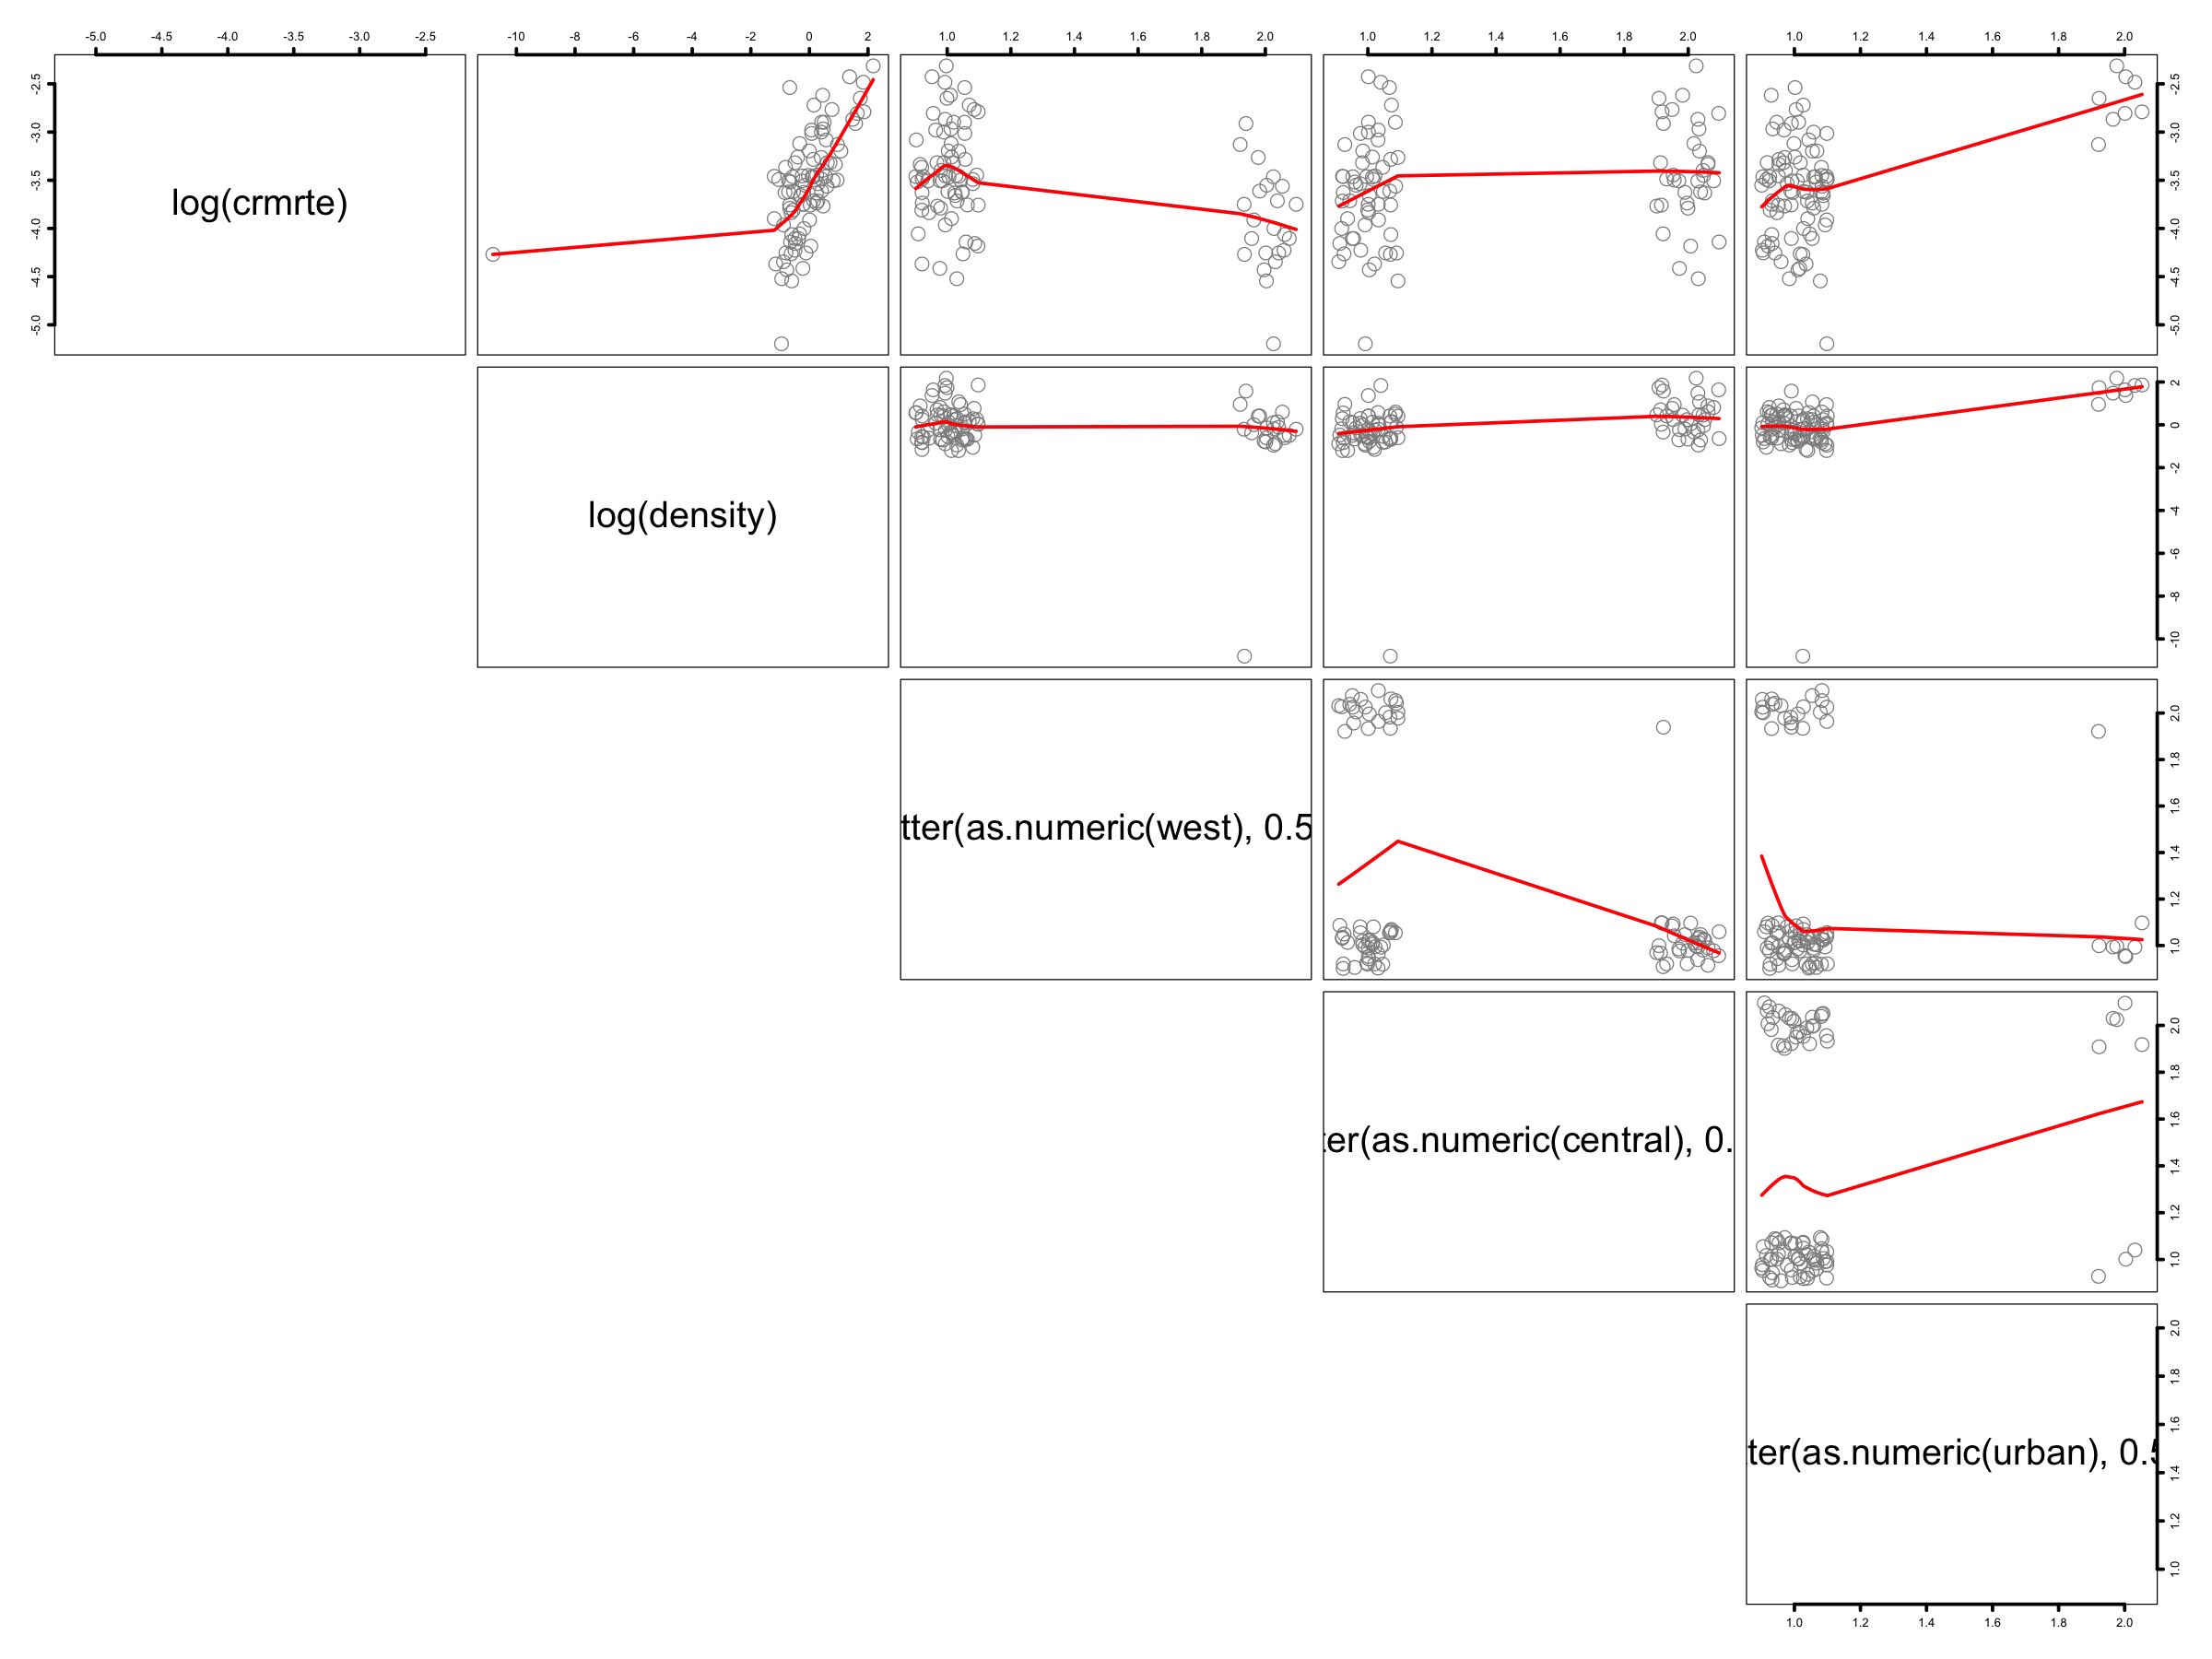

In [19]:
options(repr.plot.height = 15, repr.plot.width = 20, repr.plot.pointsize = 10)
pairs(~log(crmrte)
      + log(density)
      + jitter(as.numeric(west),0.5)
      + jitter(as.numeric(central),0.5)
      + jitter(as.numeric(urban),0.5),
      data = crime.narm,
      cex.labels=3, lower.panel = NULL,
      upper.panel=panel.smooth,
      pch=1,cex=3,lwd=3,col="grey55")

**Figure 4: Crime and demographics**
* Note that (i) there is no perfect collinearity between the explanatory variables (ii) log(*polpc*) is clearly related to log(*crmrte*).

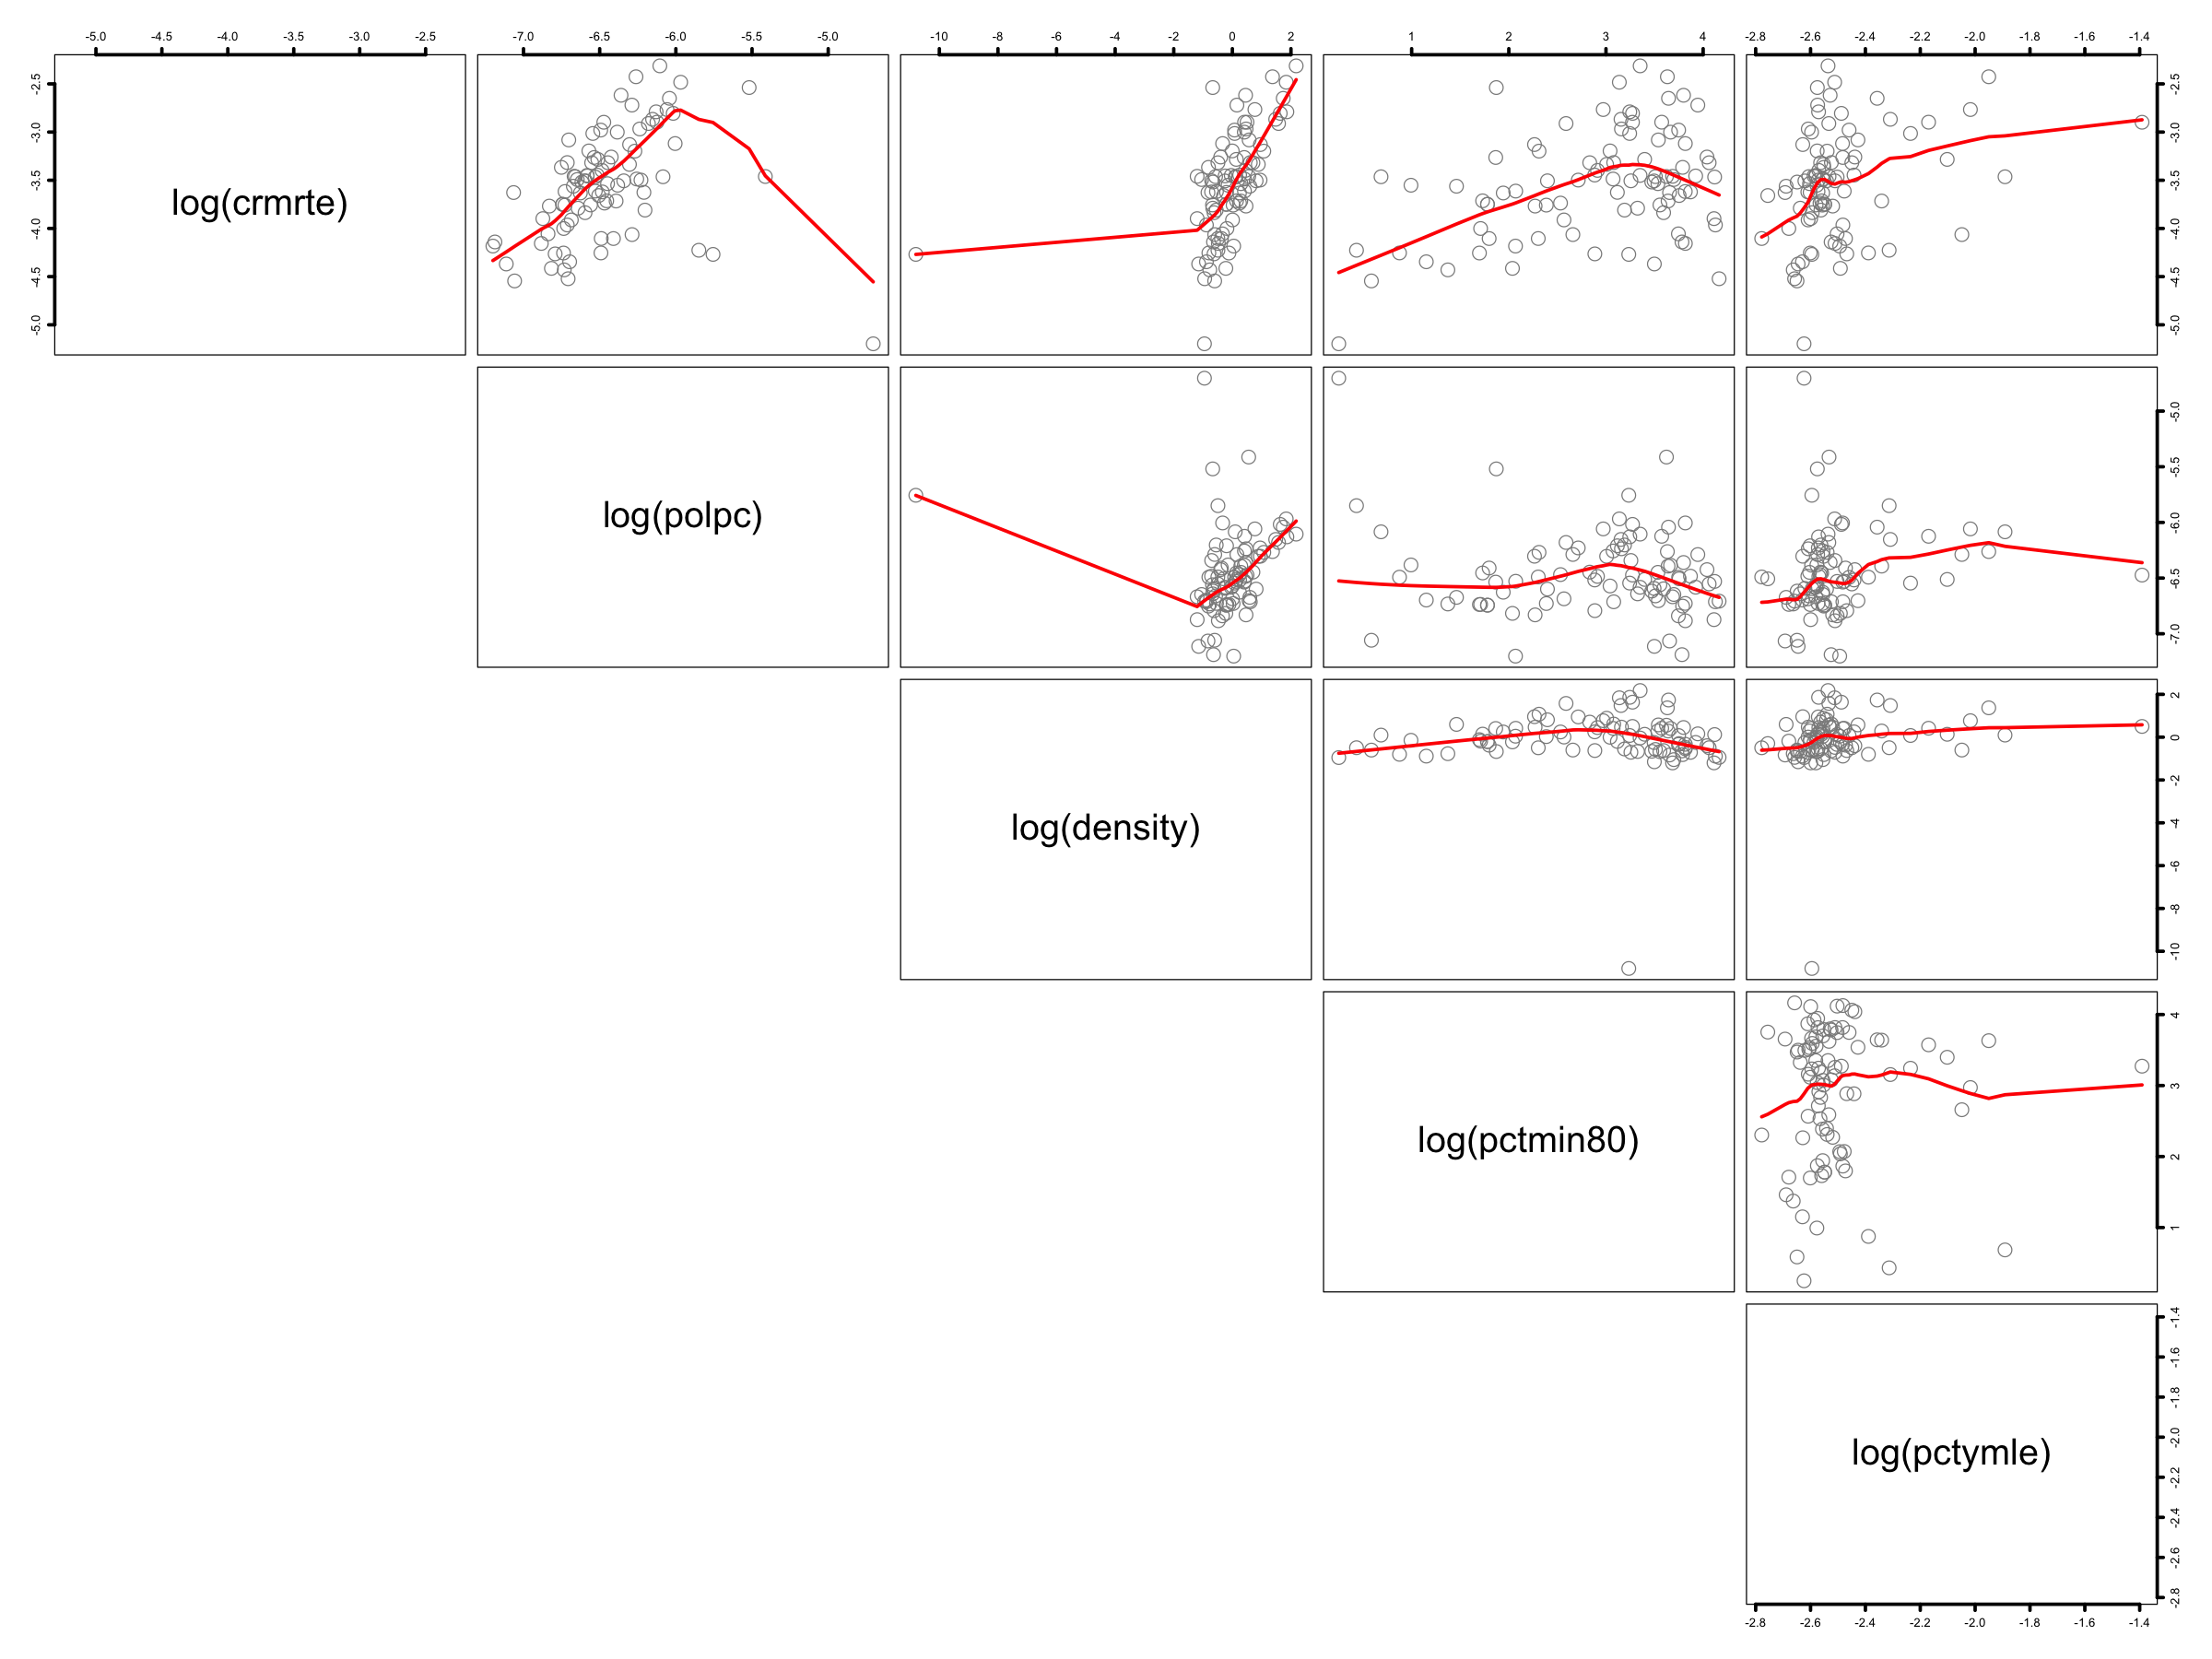

In [20]:
options(repr.plot.height = 15, repr.plot.width = 20, repr.plot.pointsize = 10)
pairs(~log(crmrte)
      + log(polpc)
      + log(density)
      + log(pctmin80)
      + log(pctymle),
      data = crime.narm,
      cex.labels=3, lower.panel = NULL,
      upper.panel=panel.smooth,
      pch=1,cex=3,lwd=3,col="grey55")

**Figure 5: Crime and economics**
* Note that (i) there is no perfect collinearity between the explanatory variables (ii) log(*wfed*), log(*wcon*), and log(*wmfg*) are clearly related to log(*crmrte*).

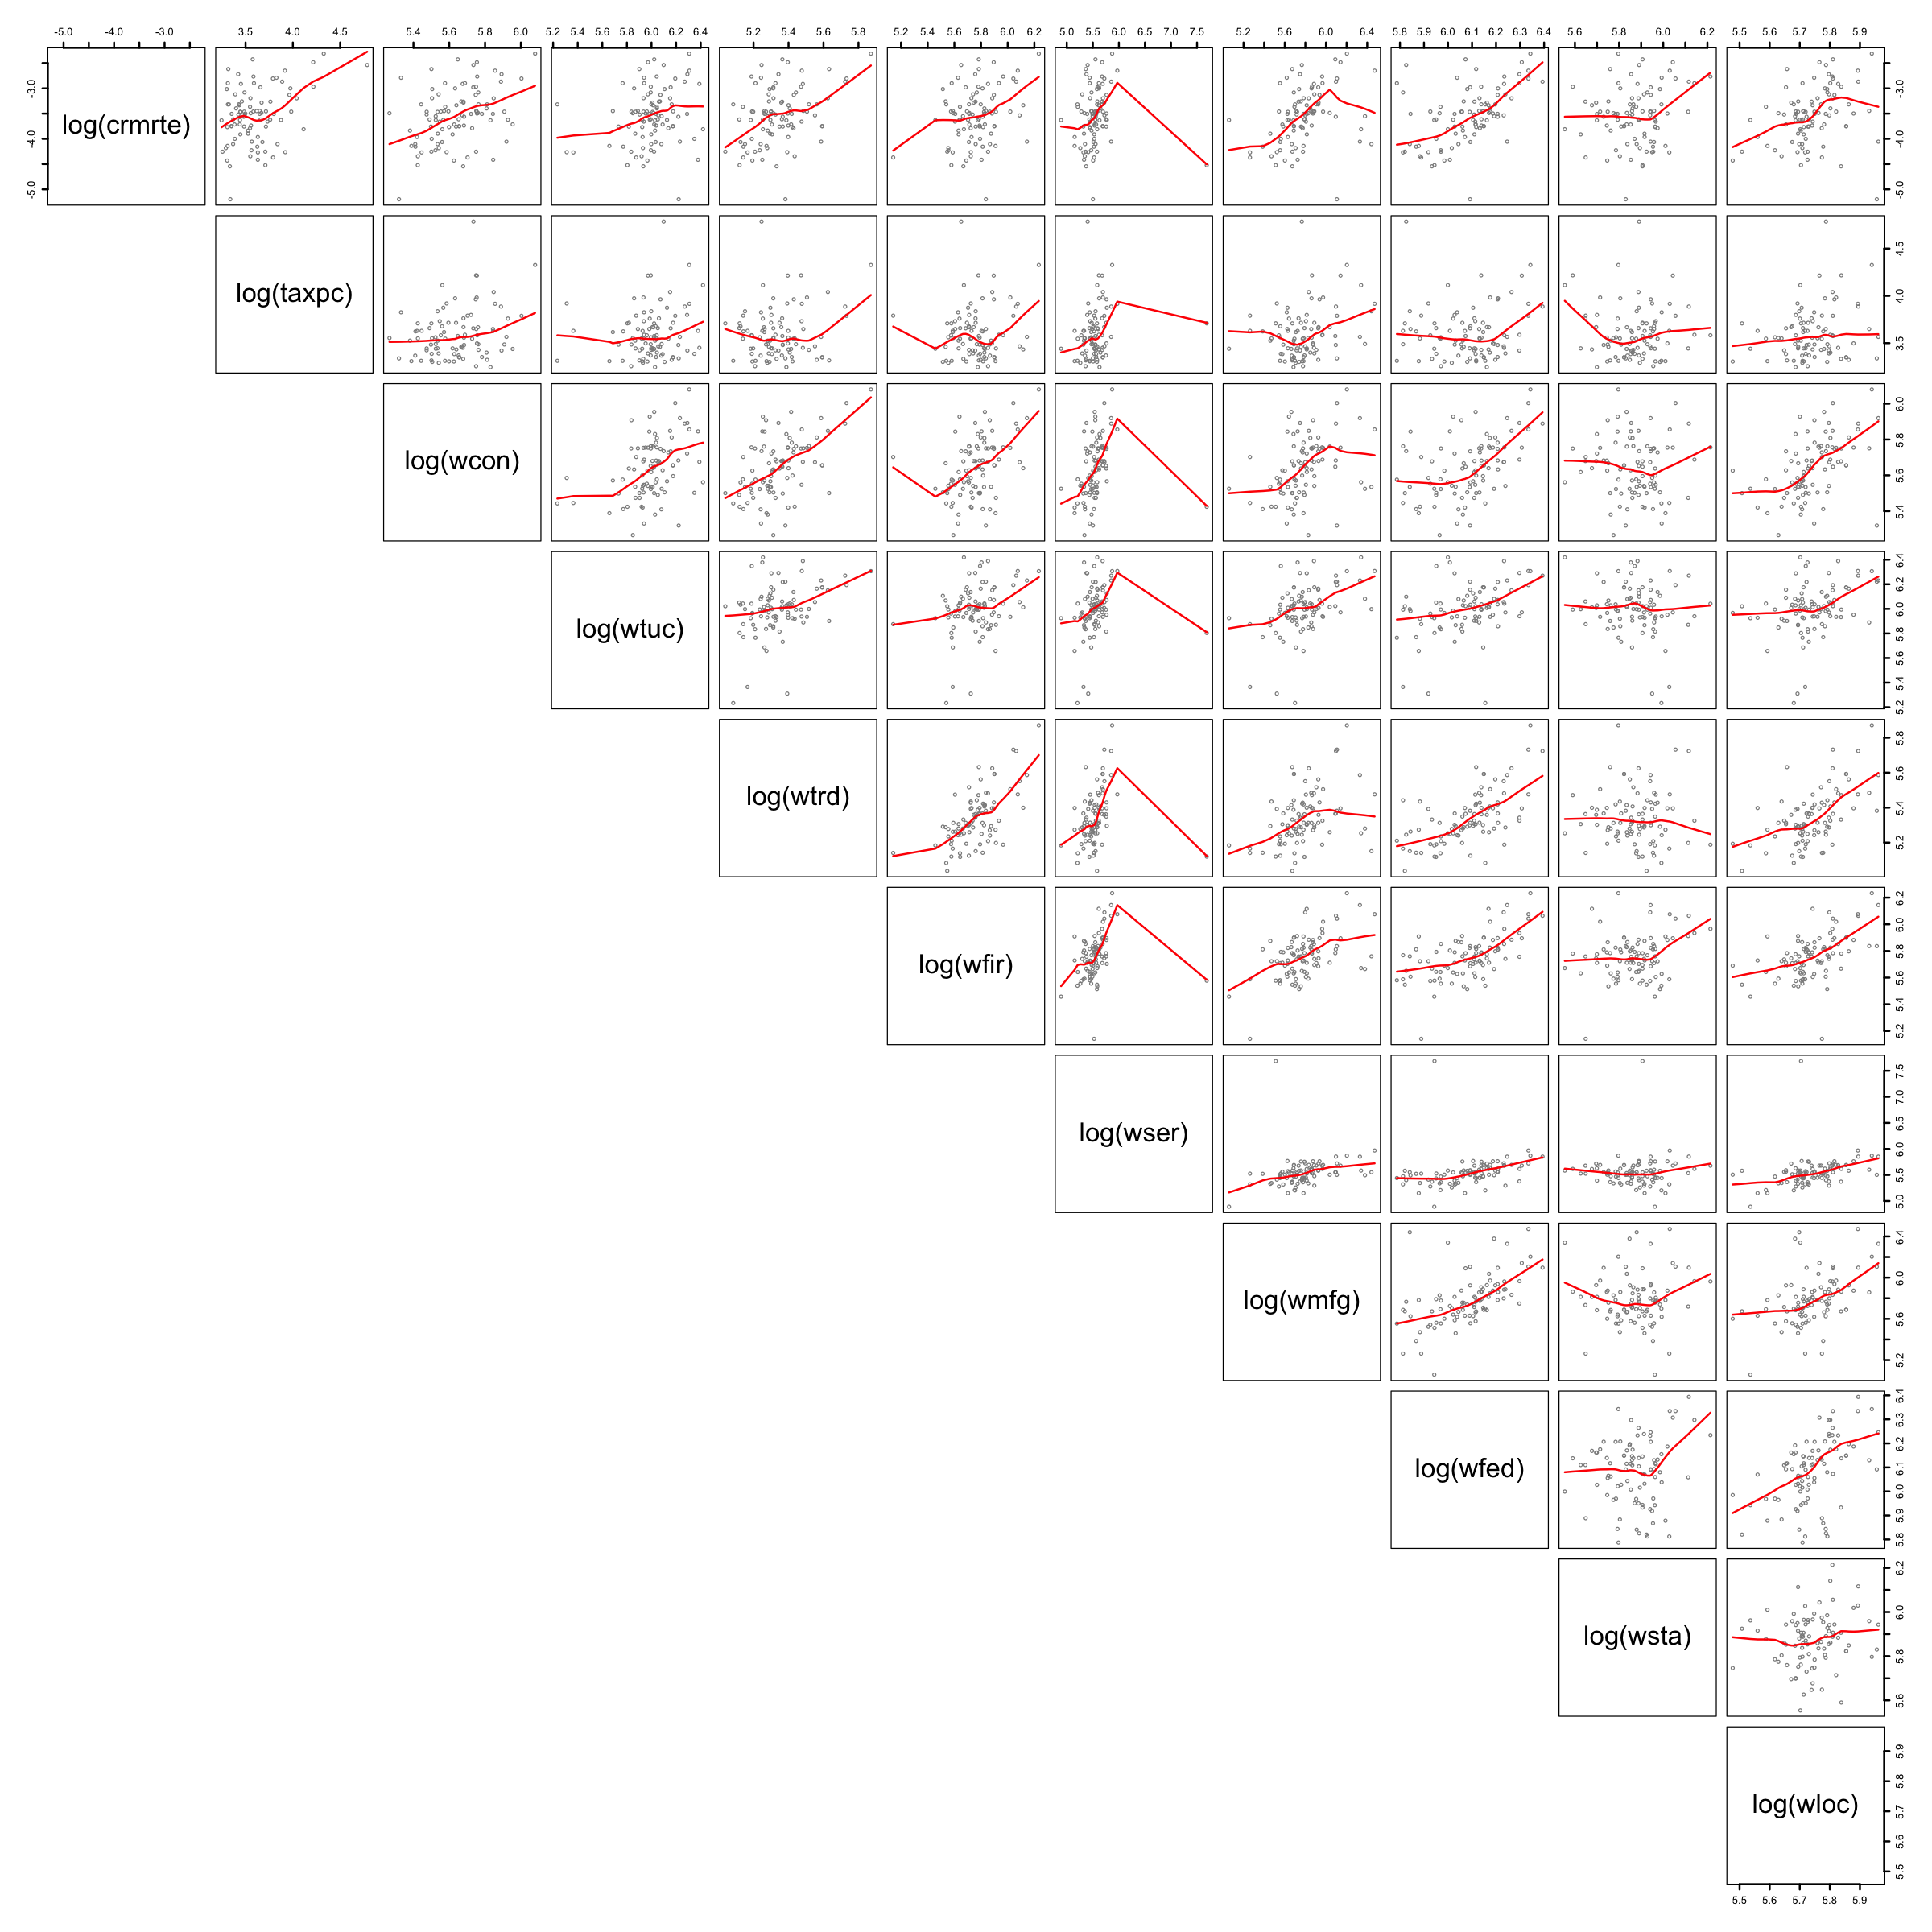

In [21]:
options(repr.plot.height = 20, repr.plot.width = 20, repr.plot.pointsize = 10)
pairs(~log(crmrte) 
      + log(taxpc)
      + log(wcon)
      + log(wtuc)
      + log(wtrd)
      + log(wfir)
      + log(wser)
      + log(wmfg)
      + log(wfed)
      + log(wsta)
      + log(wloc),
      data = crime.narm,
      cex.labels=2.5, lower.panel = NULL,
      upper.panel=panel.smooth,
      pch=1,cex=0.8,lwd=2,col="grey55")

**Figure 6: Crime and propensity to commit crime, be arrested, and sentence lengths**
* Note that (i) there is no perfect collinearity between the explanatory variables (ii) log(*prbarr*) and log(*prconv*) are clearly related to log(*crmrte*).

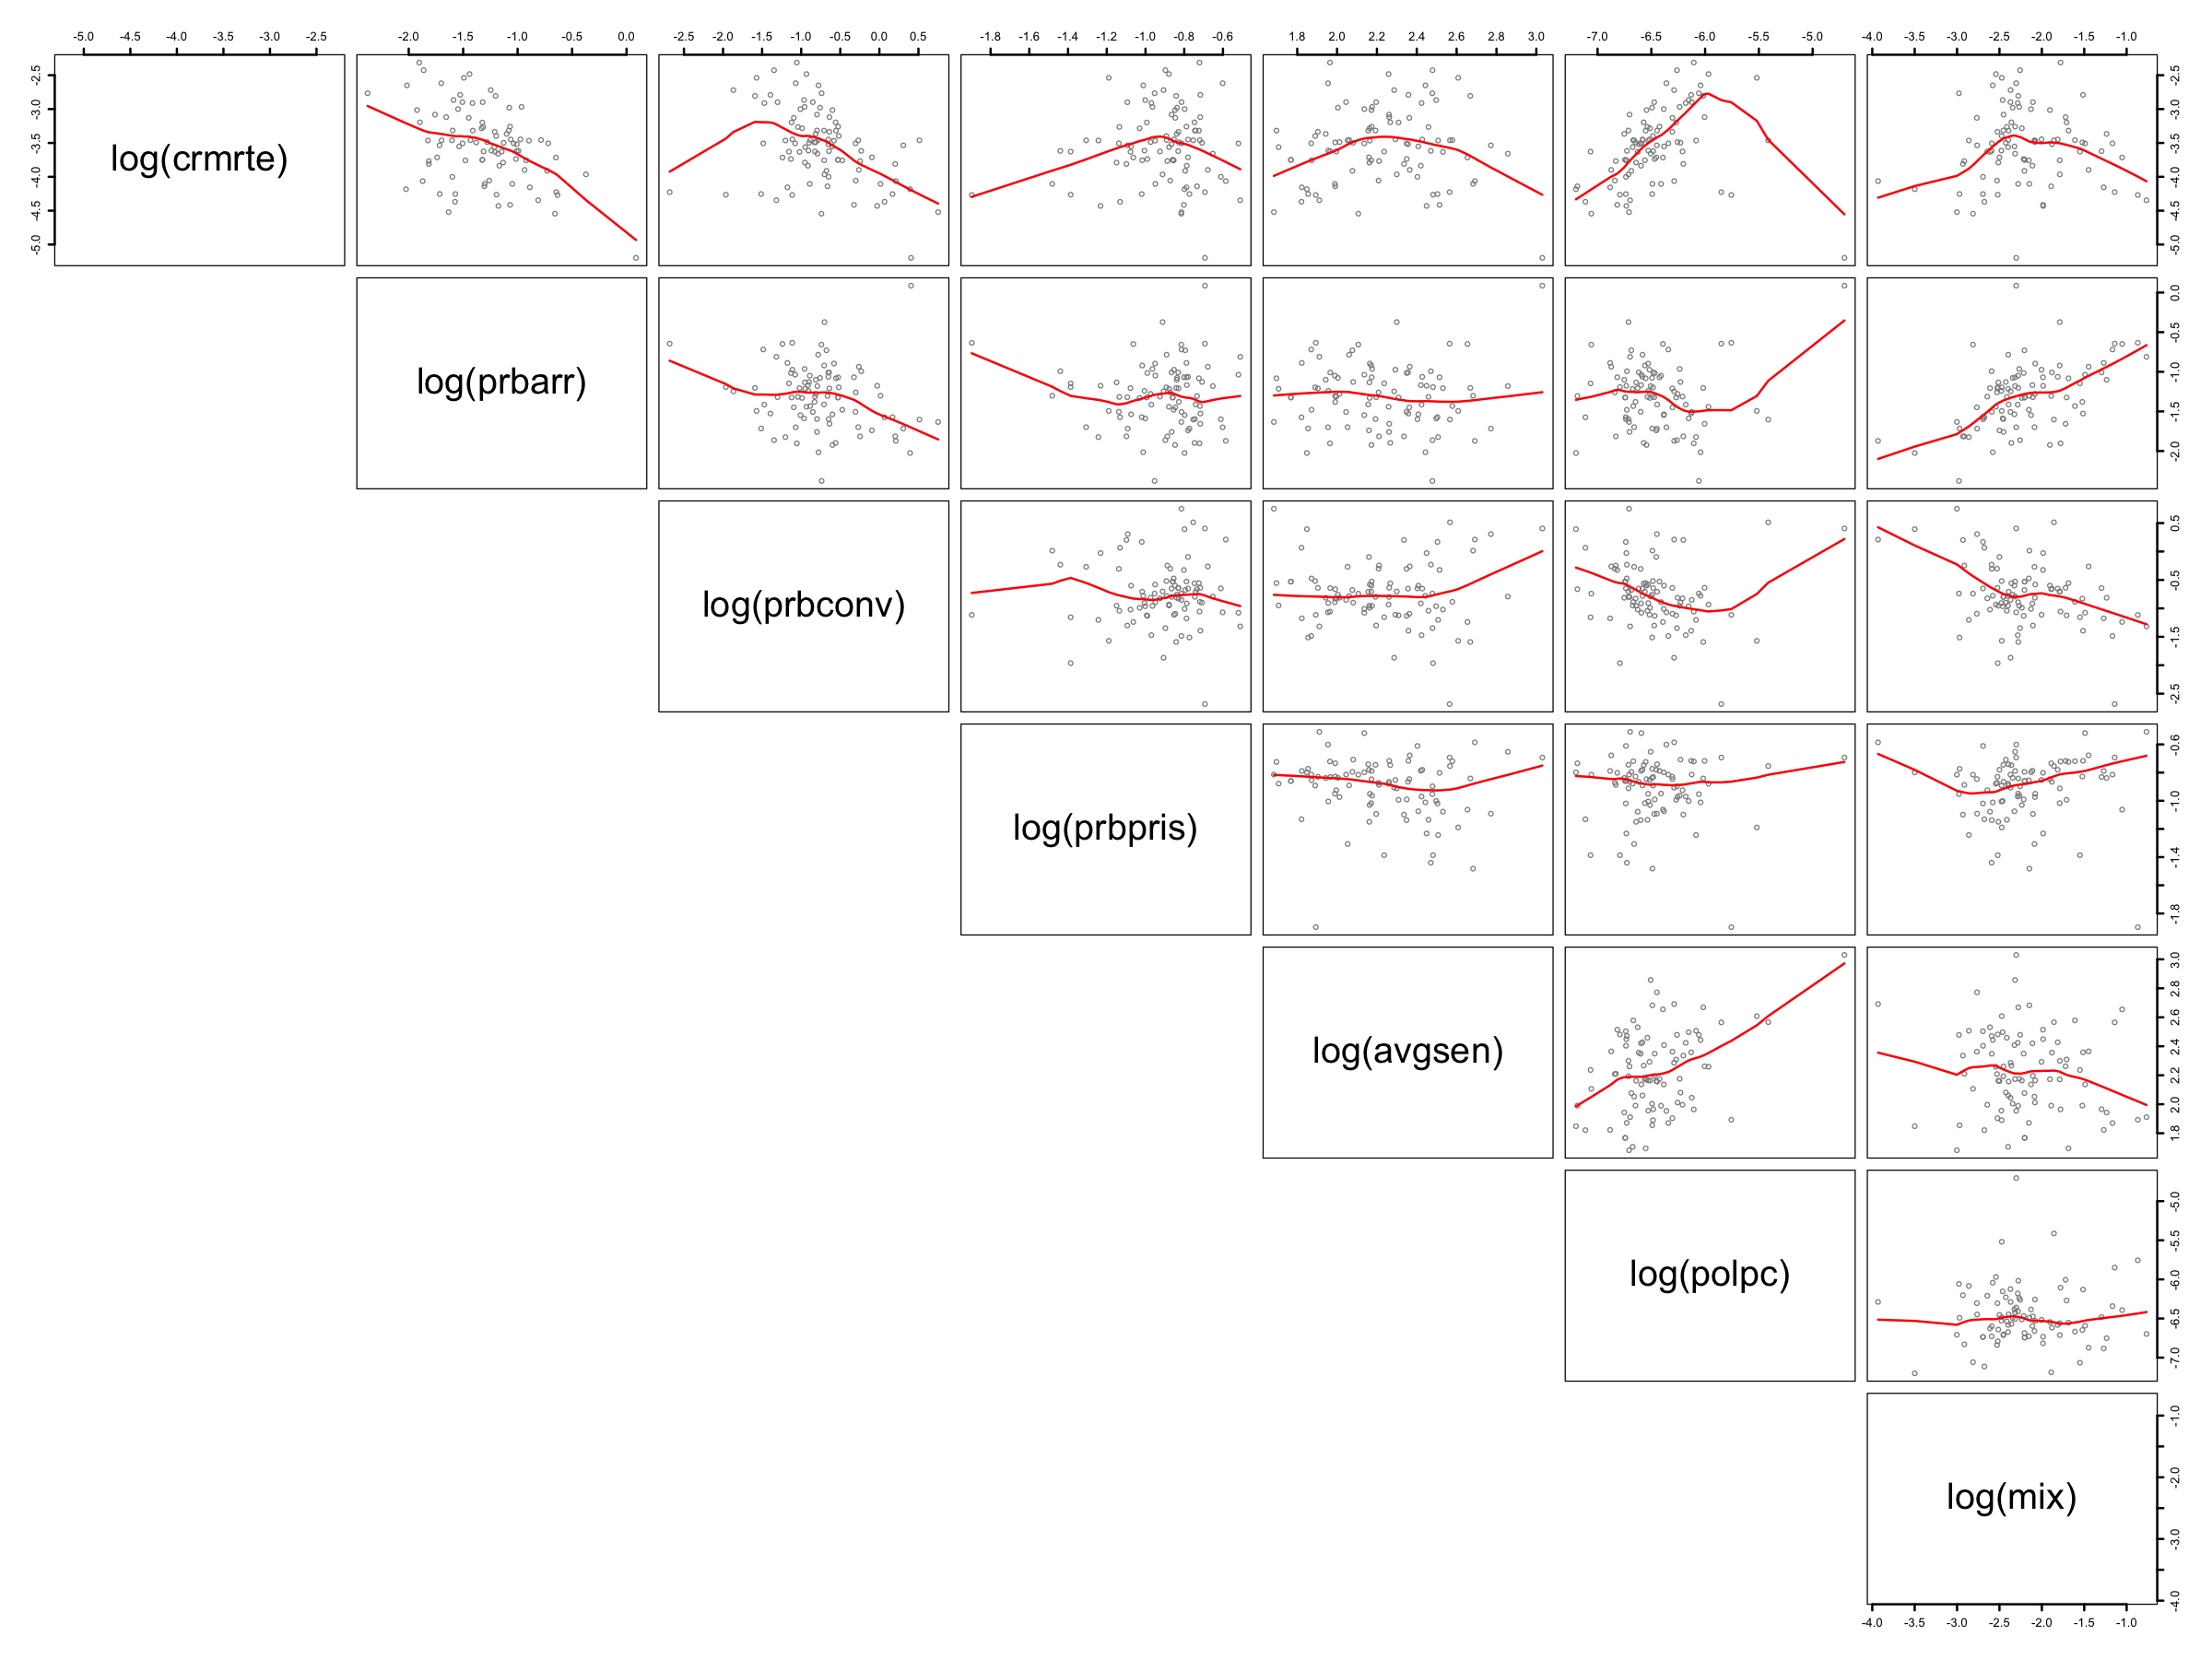

In [22]:
options(repr.plot.height = 15, repr.plot.width = 20, repr.plot.pointsize = 10)
pairs(~log(crmrte)
      + log(prbarr)
      + log(prbconv)
      + log(prbpris)
      + log(avgsen)
      + log(polpc)
      + log(mix),
      data = crime.narm,
      cex.labels=3, lower.panel = NULL,
      upper.panel=panel.smooth,
      pch=1,cex=1,lwd=2,col="grey55")

## Inferential analysis<a class="anchor" id="fifth-q"></a>  
[Back to Table of Contents](#toc-q)

**A OLS model with all variables**

In [23]:
# build OLS model with all variables
m_all <- lm(log(crmrte) ~ log(density) + log(polpc) + log(wfed) + log(wcon) + 
                          log(wtuc) + log(wtrd) + log(wfir) + log(wser) + 
                          log(wmfg) + log(wfed) + log(wsta) + log(wloc) +
                          log(prbarr) + log(prbconv) + log(prbpris) + log(avgsen) + 
                          factor(west) + factor(urban) + factor(central) + log(pctmin80) + log(pctymle), 
                          data = crime.narm)

Robust standard errors

In [24]:
# Compute robust standard errors
se.m_all = sqrt(diag(vcovHC(m_all)))

Assess percent of variation if *crmrte* that is explained by all explanatory variables

In [25]:
# check adjusted r squared
paste("adj.r.squared: ", summary(m_all)$adj.r.squared)

[1] "adj.r.squared:  0.790953213256509"

> The accuracy of prediction would be high by incorporating all variables. The risk of model overfitting and the cost (e.g. computing power, data collection, etc) would be increased at the same time. Therefore, the variables were sorted in different categories based on their characteristics.  

**For inferential analysis, we would like to achieve 3 goals**

1. Models that includes the covariates of each category to examine the robustness and accuracy of models.

2. The model that includes key explanatory variables and only covariates that you believe increase the accuracy of your results without introducing substantial bias. This model should strike a balance between accuracy and parsimony and reflect your best understanding of the determinants of crime.

3. The model with only the explanatory variables of key interest and no other covariates.

**1. Models that were built based on each category** 

*Population, goverment income*

In [26]:
mp4 <- lm(log(crmrte) ~ log(density) + log(polpc) + log(taxpc), data = crime.narm)
paste("adj.r.squared: ", summary(mp4)$adj.r.squared)

[1] "adj.r.squared:  0.336758991135941"

*Income*

In [27]:
me10 <- lm(log(crmrte) ~ log(wcon) + log(wtuc) + log(wtrd) +
         log(wfir) + log(wser) + log(wmfg) + log(wfed) +
         log(wsta) + log(wloc), data = crime.narm)
paste("adj.r.squared: ", summary(me10)$adj.r.squared)

[1] "adj.r.squared:  0.25532421106584"

*Minority and young male*

In [28]:
mm3 <- lm(log(crmrte) ~ pctmin80 + pctymle, data = crime.narm)
paste("adj.r.squared: ", summary(mm3)$adj.r.squared)

[1] "adj.r.squared:  0.115886674982097"

*Geographic factors*

In [29]:
mg4 <- lm(log(crmrte) ~ factor(west) + factor(central) + factor(urban), data = crime.narm)
paste("adj.r.squared: ", summary(mg4)$adj.r.squared)

[1] "adj.r.squared:  0.35999306318057"

*Crime outcomes*

In [30]:
mc6 <- lm(log(crmrte) ~ log(prbarr) + log(prbconv) +
         log(prbpris) + log(avgsen) + log(mix), data = crime.narm)
paste("adj.r.squared: ", summary(mc6)$adj.r.squared)

[1] "adj.r.squared:  0.397593490939127"

> The OLS models based on the categories do not provide competitive explanations of the variation in *crmrte*. Therefore, identification of key variables from each category were applied to build the new OLS model. 

**2. The model that includes key explanatory variables.**

**The procedure of explanatory key variables of interest**

<img src="lab3_steps.png">

> Here, we first applied bivariate OLS model ($\ln {(crmrte)} = \beta_0 + \beta_1 \ln {(X_1)}$) to identify the independent variables that significantly affect crime rate. Of the 24 candidate explanatory variables, a total of 12 variables (*taxpc* from government income; *wcon, wtrd, wfir, wmfg, wloc*, and *wfed* from employee incomes; *west* and *urban* from geographic factors; *pctmin80* from minority; *prbarr* and *prbconv* from crime outcomes) were identified from each category as showed above. The details of analysis is showed in the "Appendix" section.

**The model with the explanatory variables of interest**

$\ln {(crmrte)} = \beta_0 + \beta_1 \ln {(taxpc)} + \beta_2 \ln {(wcon)} + \beta_3 \ln {(wtrd)} + \beta_4 \ln {(wfir)} + \beta_5 \ln {(wmfg)} + \beta_6 \ln {(wloc)} + \beta_7 \ln {(wfed)} + \beta_8 {(west)} + \beta_9 {(urban)} + \beta_{10} \ln {(pctmin80)} + \beta_{11} \ln {(prbarr)} + \beta_{12} \ln {(prbconv)} + u$

In [31]:
# build OLS model with associated variables
m_associated <- lm(log(crmrte) ~ log(taxpc) + log(wcon) + log(wtrd) + log(wfir) +
                          log(wmfg) + log(wloc) + log(wfed) +
                          factor(west) + factor(urban) + log(pctmin80) +
                          log(prbarr) + log(prbconv), 
                          data = crime.narm)
paste("adj.r.squared: ", summary(m_associated)$adj.r.squared)

[1] "adj.r.squared:  0.700162294107207"

**The model with only the variables of key interest**

$\ln {(crmrte)} = \beta_0 + \beta_1 \ln {(prbarr)} + \beta_2 \ln {(prbconv)} + \beta_3 \ln {(wfed)} + \beta_4 \ln {(pctmin80)} + \beta_5 \ln {(prbarr)}\cdot{(prbconv)}+ u$

In [32]:
# build OLS model with key variables
m_key =(lm(log(crmrte) ~ log(prbarr) + log(prbconv) +
                            log(wfed) + log(pctmin80) + 
                            log(prbarr)*log(prbconv), 
                            data = crime.narm))
paste("adj.r.squared: ", summary(m_key)$adj.r.squared)

[1] "adj.r.squared:  0.72555676634597"

**Regression table**

In [33]:
# Compute robust standard errors
se.m_associated = sqrt(diag(vcovHC(m_associated)))
se.m_key = sqrt(diag(vcovHC(m_key)))
# We pass the standard errors into stargazer through the se argument.
stargazer(m_all, m_associated, m_key,
          type="text", keep.stat=c("n", "adj.rsq"),
          se = list(se.m_all, se.m_associated, se.m_key),
          star.cutoffs=c(0.05, 0.01, 0.001)
         )


                               Dependent variable:      
                         -------------------------------
                                   log(crmrte)          
                            (1)       (2)        (3)    
--------------------------------------------------------
log(density)               0.128                        
                          (0.178)                       
                                                        
log(polpc)                0.499*                        
                          (0.225)                       
                                                        
log(taxpc)                           0.115              
                                    (0.333)             
                                                        
log(wfed)                  0.563     1.037*    1.356*** 
                          (0.554)   (0.500)    (0.385)  
                                                        
log(wcon)                  0.2

**Interpretation of coefficients**

A:1
C:2

**m_key**:
   * For each unit increase in the log-transformed weekly wages of federal employees (*log(wfed)*), log-transformed crime rate increases 1.3 units. This coefficient is statistically and practically significant. The $p$-value associated with $H_0$: $\beta_3 = 0$ is $p < 0.001$- the slope is different from 0. When converted back to the original units, this coefficient represents a 3.6 unit increase in crime rates (crimes committed/person) for every unit increase in weekly wages for federal employees.
   * For each unit increase in the log-transformed 'probability' or propensity to be arrested (*log(prbarr)*), the log-transformed crime rate decreases by -0.384. Despite the failure of *prbarr* to satisfy the axioms of probability theory, it still constitutes and statistically and practically significant explanatory variable. The $p$-value associated with $H_0$: $\beta_1 = 0$ is $p < 0.01$- the slope is different from 0. From a practical perspective, this coefficient respresents a small but perhaps important decrease in crime rates/person. Perhaps people are less likely to commit a crime if they are more likely to be arrested.
   * For each unit increase in the log-transformed percent minority (*log(pctmin80)*), the log-transformed crime rate increases by 0.215. This coefficient is a statistically and practically significant explanatory variable. The $p$-value associated with $H_0$: $\beta_4 = 0$ is $p < 0.001$- the slope is different from 0. From a practical perspective, this coefficient seems to respresent an  important driver of crime rates/person. When converted back to the original units, it looks like every unit increase in *pctmin80* corresponds to 1.2 unit increase in the number of crimes committed/person. 
   * There is a interaction between *log(prbarr)* and *log(prbconv)*. The log-tranformed crime rate depends on the relationship between *log(prbarr)* and *log(prbconv)*. In other words, the effect of *log(prbconv)* on *log(crmrte)* depends on the values of *log(prbarr)*. This interaction is positive- the difference between the *log(prbarr)* and *log(prbconv)* slopes is positive. This interaction is statistically and of weak practical significance. The $p$-value associated with $H_0$: $\beta_1 = \beta_2 = 0$ is $p < 0.05$- the slopes are different from 0. Although the effect of *log(prbconv)* on *log(crmrte)* depends on the values of *log(prbarr)*, the slopes of the *log(prbarr)* and *log(prbconv)* are only midly positive.
   * Finally, the intercept, $\beta_0$, is significant and negative, -13. This large and statisically significant coefficient may provide evidence that we have omitted many variables and the intercept is absorbing the variation of those variables.

**Identify valuable hypothesis tests**

## Regression diagnostics<a class="anchor" id="sixth-q"></a>  
[Back to Table of Contents](#toc-q)

**Figure 7: Diagnostic plots for model with all explanatory variables**

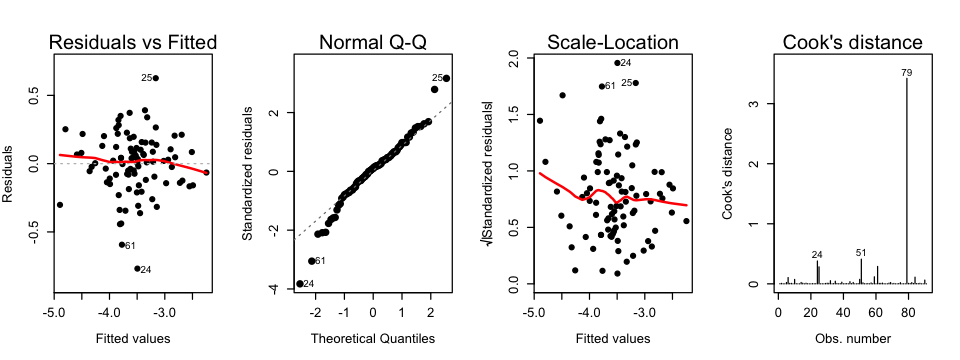

In [34]:
options(repr.plot.height = 3, repr.plot.width = 8, repr.plot.pointsize = 10)
par(mfrow = c(1,4))
plot(m_all, which=1, pch=19, cex=1, cex.lab=1, cex.main=4, lwd=2)
plot(m_all, which=2, pch=19, cex=1, cex.lab=1, cex.main=4, lwd=2)
plot(m_all, which=3, pch=19, cex=1, cex.lab=1, cex.main=4, lwd=2)
plot(m_all, which=4, pch=19, cex=1, cex.lab=1, cex.main=4, lwd=1)

**Figure 8: Diagnostic plots for model with only key explanatory variables**

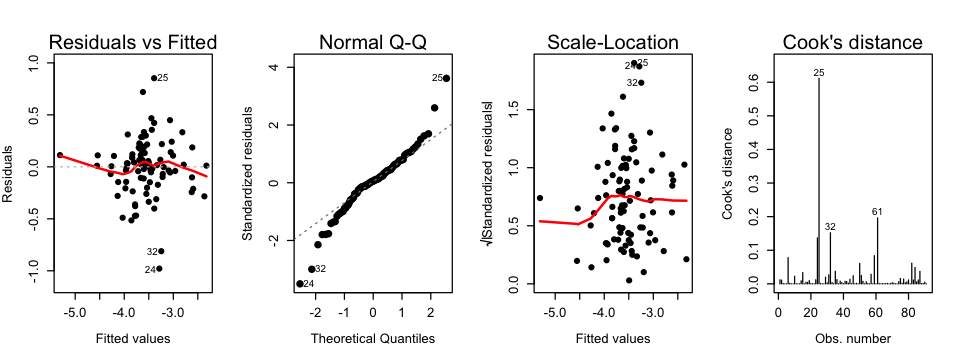

In [35]:
options(repr.plot.height = 3, repr.plot.width = 8, repr.plot.pointsize = 10)
par(mfrow = c(1,4))
plot(m_associated, which=1, pch=19, cex=1, cex.lab=1, cex.main=4, lwd=2)
plot(m_associated, which=2, pch=19, cex=1, cex.lab=1, cex.main=4, lwd=2)
plot(m_associated, which=3, pch=19, cex=1, cex.lab=1, cex.main=4, lwd=2)
plot(m_associated, which=4, pch=19, cex=1, cex.lab=1, cex.main=4, lwd=1)

**Figure 9: Diagnostic plots for most parsimonious model**

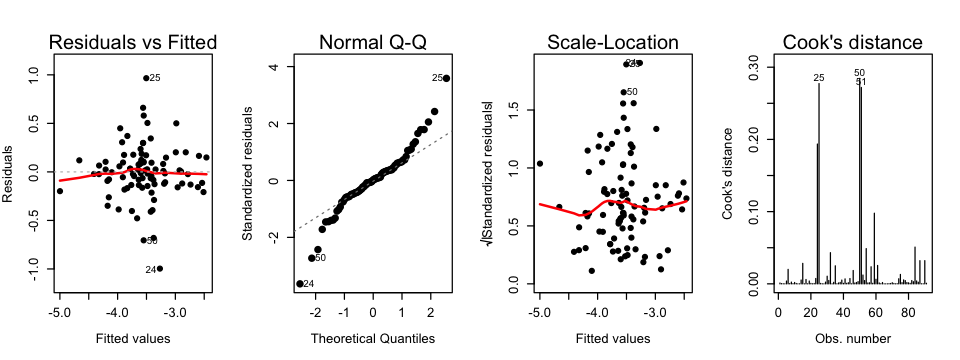

In [36]:
options(repr.plot.height = 3, repr.plot.width = 8, repr.plot.pointsize = 10)
par(mfrow = c(1,4))
plot(m_key, which=1, pch=19, cex=1, cex.lab=1, cex.main=4, lwd=2)
plot(m_key, which=2, pch=19, cex=1, cex.lab=1, cex.main=4, lwd=2)
plot(m_key, which=3, pch=19, cex=1, cex.lab=1, cex.main=4, lwd=2)
plot(m_key, which=4, pch=19, cex=1, cex.lab=1, cex.main=4, lwd=1)

**Summary of diagnostic plots and assumptions for all three models (m_all,m_associated, and m_key)**

1. **Linear in parameters**
   * As seen in our models above, all of our models are linear and additive in the parameters, the $\beta_0, \beta_1,... \beta_k$
2. **Random sampling**
   * We assume that are $n$ observations, {$(x_{i1},x_{i2},...,x_{ik},y_i):i=1,2,...,n$} are independent and identically distributed, $iid$.
3. **No perfect collinearity**
   * As documented in the scatterplot matrices above (**Figs 3-6**) and those in the appendix, there is no *perfect* collinearity. Although, there are certainly explantory variables that are correlated, these variables are not *perfectly* correlated. $\therefore$ the explanatory variables are not redundant. The models we built and the inferences we draw therefrom do not suffer from the consequences of multicollinearity.
4. **Zero conditional mean**
   * The zero conditional mean assumption, $E(u|x_1, x_2,...,x_k) = 0$ is not satisfied, *sensu stricto*, for any of the models presented above. The residual versus fitted values plots (**Figs 7-9**) document the extent to which these models violate this assumptions. If the zero mean assumption were satisfied then we should expect to see a horizontal red line, centered at zero. In contrast we see that our estimates of $u$, the residuals, are greater than expected for low fitted values for the first two models, but not for the last model where residuals are slightly smaller than expected.
5. **Homoskedasticity**
   * Homoskedasticity appears to be satisfied for all models presented above. Minor violations of this assumption can be observed in the residual versus fitted value plots (**Figs 7-9**) and the scale-location plots; however, in general, the variation about the fitted values are nearly constant across the range of values.
6. **Normality**
   * The assumption that the population error, $u$, is independent of the explanatory variables, $x_1, x_2,...,x_k$ and is normally distributed appears to be satisfied for all models presented. Although we can not observe $u$, we can see that the standarized estimates of $u$, the standardized residuals, are nearly perfectly correlated with the theoretical quantiles expected under a normal distribution (**Figs 7-9**). The exception are the tails of the residual distribution which appear to slightly deviate from our expectations.

## Discussion and Conclusions<a class="anchor" id="seventh-q"></a>  
[Back to Table of Contents](#toc-q)

$\star$ Discussion on 5-10 ommitted variables that may introduce bias. 
   * Estimate direction of bias (towards or away from 0) and, if possible, the size.
   * Identify candidate surrogates for omitted variables.
   * Synthesize findings to determine if effects are real or artifacts of ommitted variable bias.
   

### Omitted Varibale Bias:

As we can see, our preferred model m_key includes several variables that have an effect on the crime rate (*wfed, prbarr, prbconv, pctmin80*). Moreover, the Adjusted $R^2 = 0.726$ indicates that nearly $73$% of the variation in crime rate can be explained by the explanatory variables we have chosen for the model. Even in the all inclusive model m_all, the additional explanatory variables explain an additional $6.5$% of variation in crime rate. This leaves 20% of the variation in crime unexplained due to variables we either cannot measure or have access to. Here we will discuss a few such possible variables, 

- $\textbf{Poverty : }$ In and of itself, higher poverty may not necessarily cause an increase in crime rates. However, poverty and the lack of steady income, especially at a level needed to cover basic living needs may drive individuals towards crime to make ends meet or acquire material items they may be able to access otherwise. While the dataset provides information on wage, it does not provide a benchmark of the poverty line, which would allow us to compare how the poverty from county to county. Moreover, impoverished communities tend to have less access to quality education and thus better careear opportunities which can otherwise lead to more financial stability. In this case, the poverty is most closely correlated (negatively) to the wages (higher poverty leads to lower wages) and postively correlated to crime rate (higher poverty leads to higher crime rates). Thus, by omitting poverty, we can potentially under estimate the impact of wages on crime rates  

- $\textbf{Education : }$ Education can have impact on crime rates as well in that better education leads to better and steady employment opportunities which can in turn impact income. Similar to poverty, education is positively correlated to the wages (higher edcuation leads to higher wages) and negatively correlated to crime rate (higher edcuation leads to lower crime rates). Thus, by omitting education, we can potentially under estimate the impact of wages on crime rates. By measuring the impact of education on crime rates, policies can be implemented to ensure proper funding and resources are given to improve education in disadvantaged communities. We should point out that in certain cases, highly education people will still commit common crimes though they may also commit other types of crimes such as tax fraud, embezzlement etc.

- $\textbf{Type of crime : }$ We believe knowing the type of crime is an important factor that has not been captured. The 'Offense mix' variable is defined as the ratio of crimes involving "face-to-face" contact (such as robbery, assault and rape) to those that do not, but this variable does not give more granular information.  As can be seen, $'mix'$ was dropped from the final model m_key. If we have capture the type of assualt in a factored variable, public officials can focus attention to specific solutions. e.g. if assaults involving a deadly weapon are most common, this could lead to policy changes involving better gun control or if sexual assault is the most pressing issue, then specific community outreach and educational programs may be introduced.  

- $\textbf{Day of week / Time of Day : }$ Knowing when and where crimes occur most frequently can help public safety officials plan effectively and better allocate resources. This missing variable can potentially bias the 'county' explanatory variable though the direction of the bias is a bit unclear.

- $\textbf{Location : }$ Again, if we have better knowlegde of where the felonies are occuring (indoors / outdoors / type of location / intersection) can also help public safety officials curb crime by focusing on problem areas. e.g. if the data shows that criminal transactions are occuring at abandoned buildings more so than street intersections, policies can be implemented to better deal vacant properties, perhaps even convert them into spaces that postively impact the community. Again, this variable is potentially correlated to the 'county' variable.

The descrepancy between the coefficient of determination, $R^2$, for the nearly saturated model with all explanatory variables included ($R^2 = 0.791$) and the most parsimonious model($R^2 = 0.726$) is likely due to variety of sources and demands reconcilation. The full model includes all explanatory variables while the most parsimonious model includes 4 variables. It follows then that we accrue a $0.791-0.726 = 0.065 * 100 = 6.5$% increase in our ability to explain crime rate with the addition on 17 explanatory variables. Given that we can explain approximately 73% of the variation in crime rate with only 4 explainatory variables, the addition of 17 more explainatory variables to absorb $6.5$% more variation in crime rate seems wasteful.

From a broader perspective, it is more reasonable to communicate policy recommendations to the campaign using a model comprised of 4 versus all explanatory variables. The media and public have limited cognitive bandwidth. To ask the politicians to reduce crime rate by juggling 9 predictors will be difficult enough, to include 11 more is ludicrous and beyond the scope of our goal.

Finally, from an economical perspective, why use the resources to explain and predict crime rate with all variables when models with comparable performance can be built with 4 variables? More important, by using these 4 variables, we could not only reduce the crime rate but also save the government resources to improve walfare, public services, senior care etc. If this study is to be repeated or reproduced elsewhere, we can save those investigators time, money, and ease of interpretation by only including the most salient explanatory variables.

## Appendix<a class="anchor" id="eigth-q"></a>  
[Back to Table of Contents](#toc-q)

## Identify the independent variables which show significant contribution to crime rate

**Does population density, tax revenue, and police force affect crime rate?**
* Population, goverment income

In [37]:
# the explanatory variables of key interest
mp1 <- lm(log(crmrte) ~ log(density), data = crime.narm)
mp2 <- lm(log(crmrte) ~ log(polpc), data = crime.narm)
mp3 <- lm(log(crmrte) ~ log(taxpc), data = crime.narm)

In [38]:
# Compute robust standard errors
se.mp1 = sqrt(diag(vcovHC(mp1)))
se.mp2 = sqrt(diag(vcovHC(mp2)))
se.mp3 = sqrt(diag(vcovHC(mp3)))
# We pass the standard errors into stargazer through the se argument.
stargazer(mp1, mp2, mp3, 
          type="text", keep.stat=c("n", "adj.rsq"),
          se = list(se.mp1, se.mp2, se.mp3),
          star.cutoffs=c(0.05, 0.01, 0.001)
         )


                   Dependent variable:      
             -------------------------------
                       log(crmrte)          
                 (1)        (2)       (3)   
--------------------------------------------
log(density)    0.197                       
               (0.292)                      
                                            
log(polpc)                 0.419            
                          (0.472)           
                                            
log(taxpc)                         0.705*** 
                                    (0.205) 
                                            
Constant      -3.527***   -0.835   -6.081***
               (0.054)    (3.091)   (0.741) 
                                            
--------------------------------------------
Observations     91         91        91    
Adjusted R2     0.235      0.072     0.107  
Note:          *p<0.05; **p<0.01; ***p<0.001


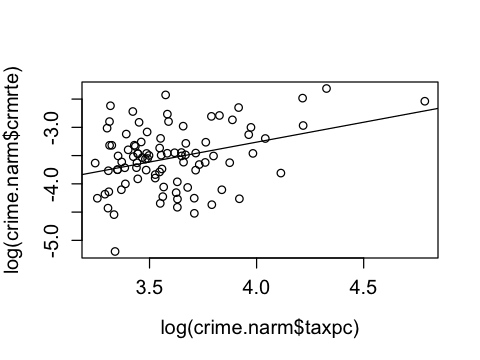

In [45]:
# check correlation between dependent variable and independent variables
options(repr.plot.height = 3, repr.plot.width = 4, repr.plot.pointsize = 10)
plot(log(crime.narm$taxpc), log(crime.narm$crmrte))
abline(mp3)

> In the category of population and goverment income, *taxpc* significantly affects crime rate with positive correlation.

**Does income affect crime rate?**
* Employee incomes

In [47]:
me1  <- lm(log(crmrte) ~ log(wcon), data = crime.narm)
me2  <- lm(log(crmrte) ~ log(wtuc), data = crime.narm)
me3  <- lm(log(crmrte) ~ log(wtrd), data = crime.narm)
me4  <- lm(log(crmrte) ~ log(wfir), data = crime.narm)
me5  <- lm(log(crmrte) ~ log(wser), data = crime.narm)
me6  <- lm(log(crmrte) ~ log(wmfg), data = crime.narm)
me7  <- lm(log(crmrte) ~ log(wfed), data = crime.narm)
me8  <- lm(log(crmrte) ~ log(wsta), data = crime.narm)
me9  <- lm(log(crmrte) ~ log(wloc), data = crime.narm)

In [48]:
# Compute robust standard errors
se.me1 = sqrt(diag(vcovHC(me1)))
se.me2 = sqrt(diag(vcovHC(me2)))
se.me3 = sqrt(diag(vcovHC(me3)))
se.me4 = sqrt(diag(vcovHC(me4)))
se.me5 = sqrt(diag(vcovHC(me5)))
se.me6 = sqrt(diag(vcovHC(me6)))
se.me7 = sqrt(diag(vcovHC(me7)))
se.me8 = sqrt(diag(vcovHC(me8)))
se.me9 = sqrt(diag(vcovHC(me9)))
# We pass the standard errors into stargazer through the se argument.
stargazer(me1, me2, me3, me4, me5, me6, me7, me8, me9,
          type="text", keep.stat=c("n", "adj.rsq"),
          se = list(se.me1, se.me2, se.me3, se.me4, se.me5, se.me6, se.me7, se.me8, se.me9),
          star.cutoffs=c(0.05, 0.01, 0.001)
         )


                                                Dependent variable:                                   
             -----------------------------------------------------------------------------------------
                                                    log(crmrte)                                       
                (1)        (2)       (3)        (4)      (5)      (6)       (7)       (8)       (9)   
------------------------------------------------------------------------------------------------------
log(wcon)     1.321***                                                                                
              (0.396)                                                                                 
                                                                                                      
log(wtuc)                 0.559                                                                       
                         (0.330)                                        

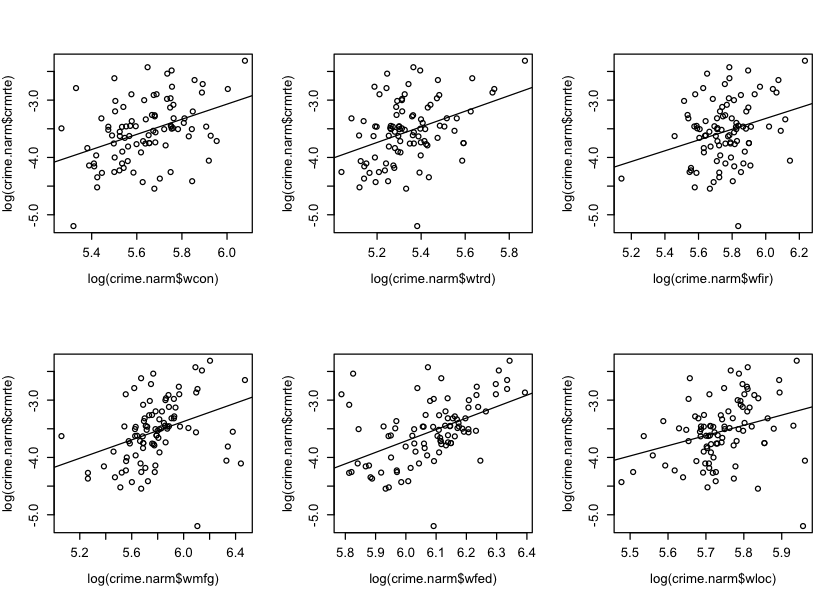

In [50]:
options(repr.plot.height = 5, repr.plot.width = 7, repr.plot.pointsize = 10)
par(mfrow = c(2,3))
plot(log(crime.narm$wcon), log(crime.narm$crmrte))
abline(me1)
plot(log(crime.narm$wtrd), log(crime.narm$crmrte))
abline(me3)
plot(log(crime.narm$wfir), log(crime.narm$crmrte))
abline(me4)
plot(log(crime.narm$wmfg), log(crime.narm$crmrte))
abline(me6)
plot(log(crime.narm$wfed), log(crime.narm$crmrte))
abline(me7)
plot(log(crime.narm$wloc), log(crime.narm$crmrte))
abline(me9)

> In the category of employee income, *wcon*, *wtrd*, *wfir*, *wmfg*, *wfed*, and *wloc* significantly affect crime rate with positive correlation.

**Do young males and the percent of population that is minority affect crime rate?**
* minority and young male

In [51]:
mm1 <- lm(log(crmrte) ~ pctmin80, data = crime.narm)
mm2 <- lm(log(crmrte) ~ pctymle, data = crime.narm)

In [52]:
# Compute robust standard errors
se.mm1 = sqrt(diag(vcovHC(mm1)))
se.mm2 = sqrt(diag(vcovHC(mm2)))
# We pass the standard errors into stargazer through the se argument.
stargazer(mm1, mm2,
          type="text", keep.stat=c("n", "adj.rsq"),
          se = list(se.mm1, se.mm2),
          star.cutoffs=c(0.05, 0.01, 0.001)
         )


                  Dependent variable:      
             ------------------------------
                      log(crmrte)          
                   (1)            (2)      
-------------------------------------------
pctmin80         0.008*                    
                 (0.004)                   
                                           
pctymle                          6.529     
                                (3.747)    
                                           
Constant        -3.737***      -4.092***   
                 (0.112)        (0.311)    
                                           
-------------------------------------------
Observations       91              91      
Adjusted R2       0.045          0.067     
Note:         *p<0.05; **p<0.01; ***p<0.001


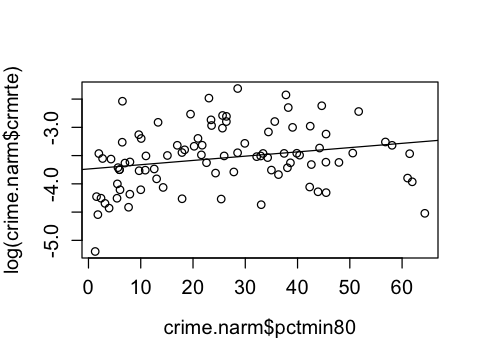

In [54]:
options(repr.plot.height = 3, repr.plot.width = 4, repr.plot.pointsize = 10)
plot(crime.narm$pctmin80, log(crime.narm$crmrte))
abline(mm1)

> In the category of minority and young male, *pctmin80* significantly affects crime rate with positive correlation.

**Does geographic location affect crime rate?**
* geographic factors

In [55]:
mg1 <- lm(log(crmrte) ~ factor(west), data = crime.narm)
mg2 <- lm(log(crmrte) ~ factor(central), data = crime.narm)
mg3 <- lm(log(crmrte) ~ factor(urban), data = crime.narm)

In [57]:
# Compute robust standard errors
se.mg1 = sqrt(diag(vcovHC(mg1)))
se.mg2 = sqrt(diag(vcovHC(mg2)))
se.mg3 = sqrt(diag(vcovHC(mg3)))
# We pass the standard errors into stargazer through the se argument.
stargazer(mg1, mg2, mg3,
          type="text", keep.stat=c("n", "adj.rsq"),
          se = list(se.mg1, se.mg2, se.mg3),
          star.cutoffs=c(0.05, 0.01, 0.001)
         )


                       Dependent variable:      
                 -------------------------------
                           log(crmrte)          
                    (1)        (2)        (3)   
------------------------------------------------
factor(west)1    -0.518***                      
                  (0.125)                       
                                                
factor(central)1              0.210             
                             (0.117)            
                                                
factor(urban)1                         0.944*** 
                                        (0.115) 
                                                
Constant         -3.413***  -3.623***  -3.627***
                  (0.061)    (0.074)    (0.054) 
                                                
------------------------------------------------
Observations         91         91        91    
Adjusted R2        0.162      0.024      0.234  
Note:              

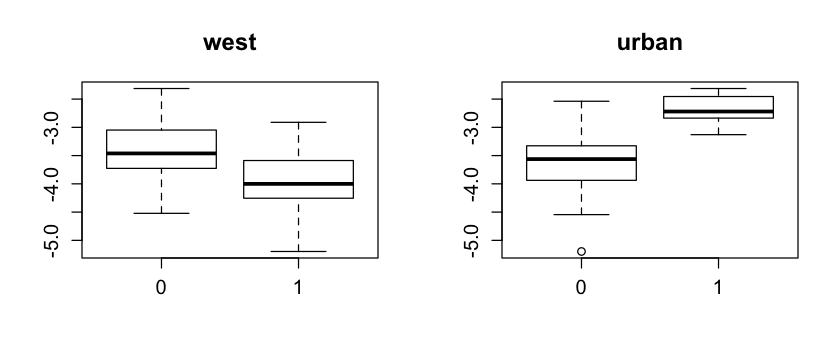

In [58]:
options(repr.plot.height = 3, repr.plot.width = 7, repr.plot.pointsize = 10)
par(mfrow = c(1,2))
plot(factor(crime.narm$west), log(crime.narm$crmrte), main = "west")
plot(factor(crime.narm$urban), log(crime.narm$crmrte), main = "urban")

> In the category of geographic factors, *west* significantly affects crime rate with negative correlation. On the other hand, *urban* significantly affects crime rate with positive correlation

**Do outcomes of crime affect crime rate?**
* crime outcomes

In [60]:
mc1 <- lm(log(crmrte) ~ log(prbarr), data = crime.narm)
mc2 <- lm(log(crmrte) ~ log(prbconv), data = crime.narm)
mc3 <- lm(log(crmrte) ~ log(prbpris), data = crime.narm)
mc4 <- lm(log(crmrte) ~ log(avgsen), data = crime.narm)
mc5 <- lm(log(crmrte) ~ log(mix), data = crime.narm)

In [61]:
# Compute robust standard errors
se.mc1 = sqrt(diag(vcovHC(mc1)))
se.mc2 = sqrt(diag(vcovHC(mc2)))
se.mc3 = sqrt(diag(vcovHC(mc3)))
se.mc4 = sqrt(diag(vcovHC(mc4)))
se.mc5 = sqrt(diag(vcovHC(mc5)))
# We pass the standard errors into stargazer through the se argument.
stargazer(mc1, mc2, mc3, mc4, mc5, 
          type="text", keep.stat=c("n", "adj.rsq"),
          se = list(se.mc1, se.mc2, se.mc3, se.mc4, se.mc5),
          star.cutoffs=c(0.05, 0.01, 0.001)
         )


                            Dependent variable:               
             -------------------------------------------------
                                log(crmrte)                   
                (1)       (2)       (3)       (4)       (5)   
--------------------------------------------------------------
log(prbarr)  -0.593***                                        
              (0.155)                                         
                                                              
log(prbconv)            -0.367*                               
                        (0.158)                               
                                                              
log(prbpris)                       0.169                      
                                  (0.287)                     
                                                              
log(avgsen)                                  0.058            
                                            (0.287)   

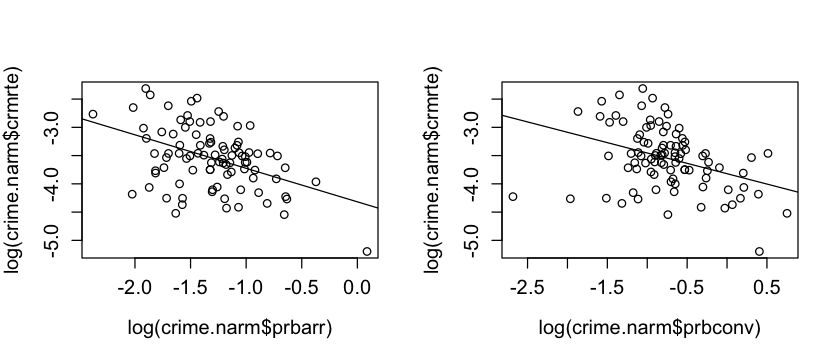

In [63]:
options(repr.plot.height = 3, repr.plot.width = 7, repr.plot.pointsize = 10)
par(mfrow = c(1,2))
plot(log(crime.narm$prbarr), log(crime.narm$crmrte))
abline(mc1)
plot(log(crime.narm$prbconv), log(crime.narm$crmrte))
abline(mc2)

> In the category of geographic factors, *prbarr* and *prbconv* significantly affect crime rate with negative correlation.